# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,nan,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,nan
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [361]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


### Вывод

Таблица состоит из 23699 строк. Требуется преобразование типов данных для столбцов: first_day_exposition (из object в date), is_apartment (из object в date в bool), также опционально можно заменить тип данных с float на int  у следующих столбцов: last_price, floors_total, balcony, days_exposition. В ряде столбцов (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearestб days_exposition) присутствуют пропуски. Также необходимо отметить что в ряде столбцов присутствуют недостоверные данные, например цена квартиры 12190 рублей, высота потолков 1 метр и 100 метров, расстояние до аэропорта 0 метров, колиество комнат 0. Также потенциальной проблемой может являться наличие слов поселок, деревня, село в названиях населенных пунктов (возможно если поле заполняется вручную кто-то их указывает, а кто-то нет).

### Шаг 2. Предобработка данных

Работа с пропущенными данными:

Столбец 'ceiling_height'

In [362]:
df['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Очевидно что помимо пропусков в таблице есть и некорректные значения, например 1 метр и 100 метров. Эти значения относятся к выбросам. Посмотрим как визуально это выглядит на гистограмме

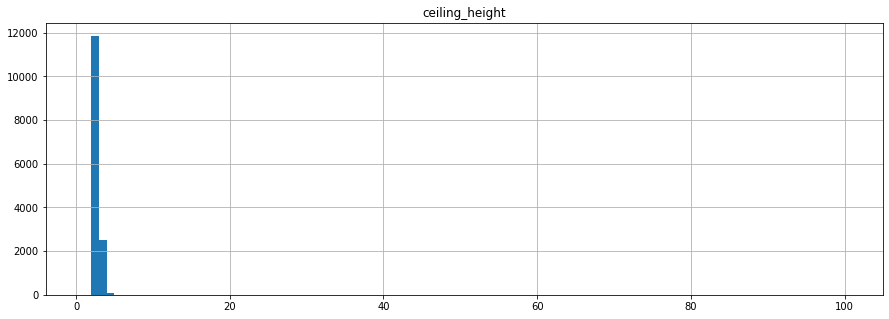

In [363]:
df.hist('ceiling_height', bins=100, figsize=(15,5))
plt.show()

Чтобы определить границы выбросов построим диаграмму типа "ящик с усами"

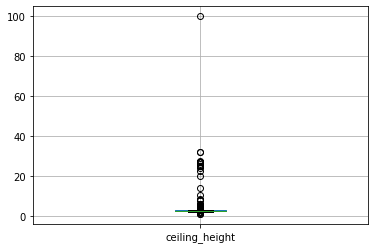

In [364]:
df.boxplot('ceiling_height')
plt.show()

Ограничим диапозон значениями от 0 до 10 метров

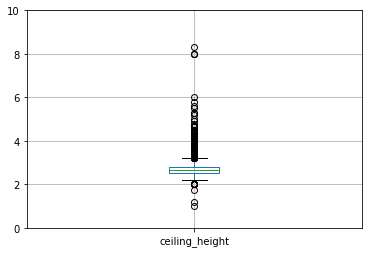

In [365]:
plt.ylim(0,10)
df.boxplot('ceiling_height')
plt.show()

На графике видно, что большая часть квартир имеет высоту потолков от 2 до 6 метров. 

In [366]:
df.query('ceiling_height < 2 or ceiling_height > 6').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.00,55.00,2018-10-31T00:00:00,2,1.00,12.00,32.40,7,NaN,...,10.00,nan,Санкт-Петербург,33053.00,14217.00,2.00,293.00,2.00,289.00,13.00
5712,5,1500000.00,42.80,2017-08-14T00:00:00,2,1.20,2.00,27.50,1,NaN,...,5.20,nan,городской посёлок Мга,nan,nan,nan,nan,nan,nan,248.00
16934,5,4100000.00,40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,NaN,...,8.34,nan,Санкт-Петербург,18732.00,20444.00,0.00,nan,3.00,80.00,71.00
3474,3,1400000.00,30.00,2018-03-16T00:00:00,1,8.00,5.00,15.30,2,False,...,7.30,nan,деревня Нурма,nan,nan,nan,nan,nan,nan,125.00
17442,0,5350000.00,54.00,2015-06-16T00:00:00,2,8.00,5.00,29.00,2,NaN,...,nan,1.00,Красное Село,24638.00,28062.00,0.00,nan,0.00,nan,469.00
15743,14,5600000.00,67.00,2016-11-11T00:00:00,3,8.00,16.00,41.00,1,NaN,...,8.00,nan,Санкт-Петербург,32691.00,11035.00,1.00,723.00,0.00,nan,474.00
5863,20,5650000.00,45.00,2018-08-15T00:00:00,1,8.30,16.00,19.30,14,NaN,...,8.30,1.00,Санкт-Петербург,13069.00,10763.00,0.00,nan,1.00,613.00,14.00
22309,20,5300000.00,45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,NaN,...,nan,nan,Санкт-Петербург,36353.00,11936.00,2.00,440.00,2.00,450.00,136.00
15061,19,5600000.00,56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,NaN,...,9.10,2.00,Санкт-Петербург,14814.00,13610.00,0.00,nan,0.00,nan,315.00
17496,15,6700000.00,92.90,2019-02-19T00:00:00,3,20.00,17.00,53.20,14,NaN,...,12.00,5.00,Санкт-Петербург,16295.00,15092.00,1.00,967.00,0.00,nan,nan


При визуальном осмотре данных можно предположить, что там где высота потолков находится в диапозоне от 20 до 32 метров скорее всего запятая поставлена не в том месте при вводе объявления. Квартиры с высотой потолков 1, 1.2, 100 метров явные выбросы, таких жилых строений не может существовать. Для квартир с высотой потолков 1.75, 8-14 метров возможно тоже имеет место опечатки при вводе объявления, поскольку цена таких квартир практически не отличаетс от среднерыночной. В любом случае квартир с высотой потолков менее 2 метров и выше 6 метров всего 32 в нашей выборке, заменим эти записи на медианные значения.

In [367]:
median = df['ceiling_height'].median()
df.loc[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 6), 'ceiling_height'] = median

Посмотрим на описание строк, в которых пропущена высота потолков

In [368]:
df[df['ceiling_height'].isna()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,9195.00,9195.00,9195.00,9195.00,0.00,9118.00,8089.00,9195.00,7857.00,4923.00,6617.00,6620.00,6620.00,2785.00,6620.00,3378.00,8467.00
mean,9.13,6077565.08,57.92,1.97,nan,11.47,32.39,6.31,10.57,0.84,28748.81,14410.90,0.56,517.50,0.76,517.30,167.31
std,5.68,11900448.64,33.30,1.04,nan,7.11,20.40,5.25,5.64,1.00,12641.30,8336.12,0.77,379.90,0.92,273.60,205.54
min,0.00,430000.00,13.00,0.00,nan,1.00,2.00,1.00,2.00,0.00,6450.00,318.00,0.00,1.00,0.00,13.00,2.00
25%,5.00,3200000.00,38.80,1.00,nan,5.00,18.00,2.00,7.20,0.00,18641.00,9509.50,0.00,293.00,0.00,303.00,44.00
50%,9.00,4300000.00,50.00,2.00,nan,9.00,29.00,5.00,9.40,1.00,26709.00,13322.00,0.00,460.00,1.00,500.00,89.00
75%,13.00,6300000.00,66.30,3.00,nan,16.00,40.00,9.00,12.00,2.00,37434.00,16865.00,1.00,637.00,1.00,722.00,210.00
max,50.00,763000000.00,631.00,19.00,nan,36.00,332.00,33.00,107.00,5.00,78527.00,60223.00,3.00,3190.00,3.00,1341.00,1572.00


Если сравнить полученные значения по выборке данных с отсутствующим значением высоты потолков с описание всей базы прежде всего по столбцам last_price, total_area, rooms, то существенных отличий нет (только медиана по стоимости немного меньше 4.3 млн. в текущей выборке и 4.65 млн. во всей базе). Пропущенных значий 39% от всей базы, это слишком много, для того чтобы заменять их на медиану либо какое то иное значение. Оставим пропущенные значения без изменений.

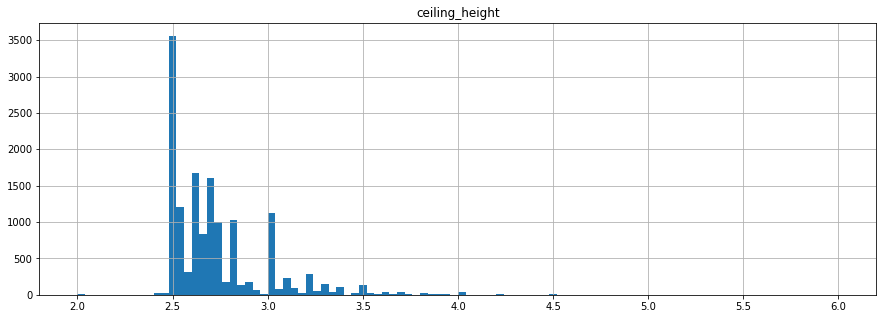

In [369]:
df.hist('ceiling_height', bins=100, figsize=(15,5))
plt.show()

На гистограмме видно, что больше всего квартир с высотой потолков 2.5 местра. Если повести замену пропусков на медианное значение (2.65 м) на гистограмме пик сместится вправо.

#### Столбец 'floors_total'

In [370]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,nan,nan,30.80,4,NaN,...,12.00,nan,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,nan,49.00
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,nan,nan,20.75,1,NaN,...,nan,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,251.00
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,nan,nan,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,nan,nan,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,123.00
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,nan,nan,nan,9,NaN,...,nan,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.00,63.50,2017-05-24T00:00:00,2,2.80,nan,nan,3,NaN,...,nan,nan,Санкт-Петербург,51340.00,15363.00,0.00,nan,1.00,853.00,512.00
22656,4,4574160.00,64.50,2017-04-02T00:00:00,2,nan,nan,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,127.00
22808,0,14569263.00,110.40,2016-11-20T00:00:00,3,nan,nan,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,19095.00,4529.00,0.00,nan,0.00,nan,260.00
23590,0,21187872.00,123.30,2017-04-25T00:00:00,3,nan,nan,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,19095.00,4529.00,0.00,nan,0.00,nan,104.00


Данных не хватает в 86 строках. Можно предположить, что пользователи сознательно не внесли данные в случае когда их квартира находится на последнем этаже, но это только предположение, которое невозможно проверить. Вариант когда мы заменим пропуски на медиану или среднее значение тоже не корректно, поскольку возникнут ситуации когда этаж квартиры может оказаться выше чем высота всего здания. Поскольку данных с протусками всего 86 строк из 23699 наиболее целесообразно эти строки удалить.

In [371]:
df = df.dropna(subset=['floors_total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

#### Столбцы 'living_area' и 'kitchen_area'

Проверяем предположение, что жилая площадь и площадь кухни не заполнены у студий, аппартаментов и квартир со свободной планировкой. Предварительно приведем is_apartment к булиевому типу и заменим все попуски на False

In [372]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [373]:
pd.options.mode.chained_assignment = None #отключает предупреждения SettingWithCopyWarning

In [374]:
df['is_apartment'] = df['is_apartment'].fillna(False)
#df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
#df['is_apartment'] = df['is_apartment'].where(df['is_apartment'] == True, False)

In [375]:
df['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

In [377]:
df.query('is_apartment == True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 543 to 23236
Data columns (total 22 columns):
total_images            50 non-null int64
last_price              50 non-null float64
total_area              50 non-null float64
first_day_exposition    50 non-null object
rooms                   50 non-null int64
ceiling_height          44 non-null float64
floors_total            50 non-null float64
living_area             42 non-null float64
floor                   50 non-null int64
is_apartment            50 non-null bool
studio                  50 non-null bool
open_plan               50 non-null bool
kitchen_area            35 non-null float64
balcony                 31 non-null float64
locality_name           50 non-null object
airports_nearest        41 non-null float64
cityCenters_nearest     43 non-null float64
parks_around3000        43 non-null float64
parks_nearest           19 non-null float64
ponds_around3000        43 non-null float64
ponds_nearest           30 no

In [378]:
df.query('studio == True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 144 to 23637
Data columns (total 22 columns):
total_images            146 non-null int64
last_price              146 non-null float64
total_area              146 non-null float64
first_day_exposition    146 non-null object
rooms                   146 non-null int64
ceiling_height          77 non-null float64
floors_total            146 non-null float64
living_area             139 non-null float64
floor                   146 non-null int64
is_apartment            146 non-null bool
studio                  146 non-null bool
open_plan               146 non-null bool
kitchen_area            0 non-null float64
balcony                 91 non-null float64
locality_name           146 non-null object
airports_nearest        91 non-null float64
cityCenters_nearest     91 non-null float64
parks_around3000        91 non-null float64
parks_nearest           20 non-null float64
ponds_around3000        91 non-null float64
ponds_nearest    

In [379]:
df.query('open_plan == True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 349 to 23592
Data columns (total 22 columns):
total_images            67 non-null int64
last_price              67 non-null float64
total_area              67 non-null float64
first_day_exposition    67 non-null object
rooms                   67 non-null int64
ceiling_height          15 non-null float64
floors_total            67 non-null float64
living_area             62 non-null float64
floor                   67 non-null int64
is_apartment            67 non-null bool
studio                  67 non-null bool
open_plan               67 non-null bool
kitchen_area            0 non-null float64
balcony                 54 non-null float64
locality_name           67 non-null object
airports_nearest        37 non-null float64
cityCenters_nearest     37 non-null float64
parks_around3000        37 non-null float64
parks_nearest           11 non-null float64
ponds_around3000        37 non-null float64
ponds_nearest           24 non

В квартирах студиях и квартирах со свободной планировкой зона кухни не выделена отдельно, поэтому в объявлениях она не заполнялась пользователями. Проверим корреляцию между площадью квартиры, жилой площадью и площадью кухни. 

In [380]:
df[df['living_area'] > 0]['living_area'].corr(df[df['living_area'] > 0]['total_area'])

0.9397704889780092

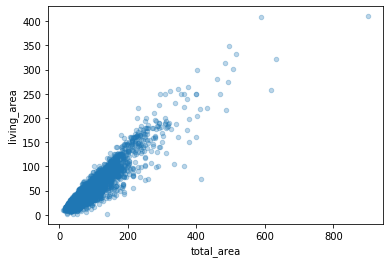

In [381]:
df[df['living_area'] > 0].plot(x='total_area', y='living_area', kind='scatter', alpha=0.3)
plt.show()

Корреляция 0,94 достаточно сильная, это подтверждает и график. Заполним пропуски в жилой площади в качестве доли от общей площади.

In [382]:
k = df[df['living_area'] > 0]['living_area'].median() / df[df['living_area'] > 0]['total_area'].median()
def living_area_new(data):
    if data['living_area'] > 0:
        return data['living_area']
    else:
        return k * data['total_area']
df['living_area_new'] = df.apply(living_area_new, axis=1)

In [383]:
df['living_area_new'].corr(df['total_area'])

0.9464173929441191

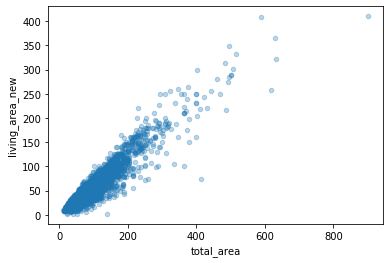

In [384]:
df[df['living_area_new'] > 0].plot(x='total_area', y='living_area_new', kind='scatter', alpha=0.3)
plt.show()

После замены пропусков коэффициент корреляции немного вырос, это ожидаемо с учетом использованного способа замены.

Проверяем коэффициент корреляции между площадью кухни общей площадью квартиры.

In [385]:
df[df['kitchen_area'] > 0]['kitchen_area'].corr(df[df['kitchen_area'] > 0]['total_area'])

0.6094677166170354

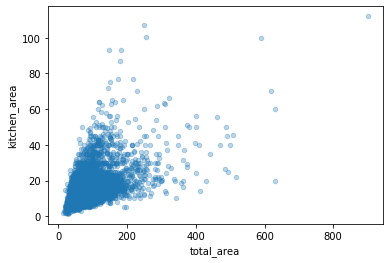

In [386]:
df[df['kitchen_area'] > 0].plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3)
plt.show()

Коэффициент корреляции площади кухни от общей площади квартиры слабый, всего 0,6. Попробуем его усилить расчитав коэффициент корреляции нежилой площади квартиры и площади кухни. Дополнительно усилим коэффиент коррелиции за счет расчета зависимости нежилой площади и площади кухни для квартир с разным количеством комнат.

In [387]:
df['no_living_area'] = df['total_area'] - df['living_area_new']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan,51.00,57.00
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,False,...,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00,18.60,21.80
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,False,...,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,34.30,21.70
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,False,...,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,91.73,67.27
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,32.00,68.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,...,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,nan,73.30,60.51
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,False,...,Тосно,nan,nan,nan,nan,nan,nan,45.00,38.00,21.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,False,...,село Рождествено,nan,nan,nan,nan,nan,nan,nan,29.70,27.00
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,False,...,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00,44.28,32.47


In [388]:
(df[(df['kitchen_area'] > 0) & (df['living_area'] > 0)]['kitchen_area']
         .corr(df[(df['kitchen_area'] > 0) & (df['living_area'] > 0)]['no_living_area'])
)

0.7363264953825356

In [389]:
df.query('rooms == 0').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area
count,194.00,194.00,194.00,194.00,82.00,194.00,183.00,194.00,0.00,126.00,117.00,117.00,117.00,28.00,117.00,68.00,180.00,194.00,194.00
mean,7.84,3344493.04,29.32,0.00,2.81,16.90,18.87,8.54,nan,1.58,24531.66,13403.74,0.29,586.29,0.82,524.19,110.32,19.67,9.65
std,5.09,5084413.83,26.05,0.00,0.38,6.93,6.55,6.31,nan,0.66,12439.14,5047.41,0.56,304.77,0.88,276.42,159.88,15.43,11.47
min,0.00,945750.00,15.50,0.00,2.50,3.00,2.00,1.00,nan,0.00,6989.00,1261.00,0.00,38.00,0.00,72.00,3.00,2.00,0.00
25%,4.00,2300000.00,24.06,0.00,2.70,12.00,16.00,3.00,nan,1.00,14509.00,11618.00,0.00,392.75,0.00,345.25,27.75,16.00,6.65
50%,7.00,2700000.00,26.08,0.00,2.75,17.00,18.00,7.00,nan,2.00,21460.00,13615.00,0.00,532.00,1.00,527.50,49.50,18.00,8.53
75%,11.00,3395000.00,28.37,0.00,2.80,23.00,19.95,13.00,nan,2.00,34201.00,16414.00,0.00,757.25,1.00,683.25,119.25,19.75,10.75
max,21.00,71000000.00,371.00,0.00,5.80,35.00,68.00,26.00,nan,2.00,55551.00,29846.00,2.00,1199.00,3.00,1159.00,931.00,214.04,156.96


Заменим значени 0 в столбце rooms на 1. Из таблицы выше видно, что медиана и перцентили в столбце total_area скорее всего соответсвуют площади однокомнатной квартиры.

In [390]:
df.loc[df['rooms'] == 0, 'rooms'] = 1

Введем категории квартир в зависимости от количества комнат. Поскольку квартир с количеством комнат более 4 немного, объединим их в одну категорию "4+"

In [391]:
def rooms_cat(rooms):
    if rooms <= 4:
        return rooms
    else:
        return '4+'
df['rooms_cat'] = df['rooms'].apply(rooms_cat)

In [392]:
df['rooms_cat'].value_counts()

1     8209
2     7913
3     5795
4     1177
4+     519
Name: rooms_cat, dtype: int64

In [393]:
for rooms,data in df.groupby('rooms_cat'):
    print(rooms, data[(data['kitchen_area'] > 0) & (data['living_area'] > 0)]['kitchen_area'].corr(data[(data['kitchen_area'] > 0) & (data['living_area'] > 0)]['no_living_area']))

1 0.7677341404134195
2 0.8036615977952781
3 0.7744708109303161
4 0.7192491933824602
4+ 0.6263860413098872


Как видно из коэффициентов корреляции из таблицы выше они существенно лучше, чем первоначальная корреляция между площадью кухни и площадью квартиры в размерер 0.6. Заполним пропуски в kitchen_area исходя из нежилой площади и количества комнат.

In [394]:
df_rooms_cat_r = []
df_rooms_cat_k = []
for r in df['rooms_cat'].unique():
    k = df[(df['kitchen_area'] > 0) & (df['rooms_cat'] == r)]['kitchen_area'].median() / df[(df['kitchen_area'] > 0) & (df['rooms_cat'] == r)]['no_living_area'].median()
    df_rooms_cat_r.append(r)
    df_rooms_cat_k.append(k)
df_rooms_cat = pd.DataFrame(data=df_rooms_cat_k, index=df_rooms_cat_r, columns={'k'})

def kitchen_area_new(data):
    if data['studio'] == True or data['open_plan'] == True:
        return 0
    elif data['kitchen_area'] > 0:
        return data['kitchen_area']
    else:
        return df_rooms_cat.loc[data['rooms_cat'],'k'] * data['no_living_area']
#kitchen_area_new(df.loc[37])
df['kitchen_area_new'] = df.apply(kitchen_area_new, axis=1)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

#### Столбец 'balcony'

In [396]:
df['balcony'].value_counts()

1.00    4195
0.00    3713
2.00    3657
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

Заменим все пропущенные значения в столбце balcony на 0 (сделаем предположение, что если пользователь не указал количество балконов, то балкона в квартире нет).

In [397]:
df['balcony'] = df['balcony'].fillna(0)

#### Столбец 'locality_name'

In [398]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area,rooms_cat,kitchen_area_new
1097,3,8600000.00,81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,False,...,4258.00,0.00,nan,0.00,nan,147.00,50.80,30.90,3,8.80
2033,6,5398000.00,80.00,2017-05-30T00:00:00,3,nan,4.00,42.60,2,False,...,nan,nan,nan,nan,nan,34.00,42.60,37.40,3,18.60
2603,20,3351765.00,42.70,2015-09-20T00:00:00,1,nan,24.00,15.60,3,False,...,17369.00,0.00,nan,1.00,374.00,276.00,15.60,27.10,1,10.70
2632,2,5130593.00,62.40,2015-10-11T00:00:00,2,nan,24.00,33.10,21,False,...,17369.00,0.00,nan,1.00,374.00,256.00,33.10,29.30,2,8.20
3574,10,4200000.00,46.50,2016-05-28T00:00:00,2,nan,5.00,30.80,5,False,...,8127.00,0.00,nan,1.00,603.00,45.00,30.80,15.70,2,6.50
4151,17,17600000.00,89.50,2014-12-09T00:00:00,2,3.00,8.00,39.62,7,False,...,3902.00,1.00,485.00,3.00,722.00,869.00,39.62,49.88,2,13.38
4189,7,9200000.00,80.00,2015-12-10T00:00:00,3,4.00,4.00,52.30,3,False,...,3039.00,1.00,690.00,1.00,953.00,223.00,52.30,27.70,3,10.40
4670,1,5500000.00,83.00,2015-08-14T00:00:00,3,nan,7.00,nan,6,False,...,5382.00,1.00,446.00,1.00,376.00,350.00,47.88,35.12,3,12.26
5343,19,13540000.00,85.50,2016-01-20T00:00:00,3,nan,7.00,59.10,5,False,...,9538.00,1.00,67.00,0.00,nan,303.00,59.10,26.40,3,8.30
5707,7,3700000.00,30.00,2016-04-29T00:00:00,1,nan,24.00,20.00,23,False,...,16788.00,0.00,nan,1.00,170.00,49.00,20.00,10.00,1,4.74


Пропущенных значений не много (всего 48), при этом судя по расстоянию до центра города это не всегда Санкт_Петербург. Поскольку населенный пункт важен для дальнейшего анализа, то наиболее целесообразно удалить строки с пропущенными значениями в столбце locality_name.

In [399]:
df = df.dropna(subset=['locality_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

#### Столбцы с картографическими данными

In [400]:
df['airports_nearest'].describe()

count   18041.00
mean    28797.08
std     12632.50
min         0.00
25%     18565.00
50%     26757.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

Проверим не являются ли некорретными данные с расстоянием до аэропорта 0 метров

In [401]:
df[df['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area,rooms_cat,kitchen_area_new
21085,0,7000000.00,34.70,2018-09-23T00:00:00,1,2.70,9.00,19.80,3,False,...,22801.00,0.00,nan,0.00,nan,60.00,19.80,14.90,1,6.00


In [402]:
df[df['airports_nearest'] == 0].loc[:,['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
21085,Санкт-Петербург,22801.00


Возможно 0 это корректные данные для расстояния до аэропорта, поскольку аэропорт Пулково находится на расстоянии 22800 метро от центра города. Оставим данное значение без изменений.

In [403]:
print(len(df['locality_name'].unique()))

364


In [404]:
print(len(df[df['airports_nearest'] > 0]['locality_name'].unique()))

26


In [405]:
print(len(df[df['airports_nearest'].isna()]['locality_name'].unique()))

344


Очистим locality_name от слов "деревня", "посёлок" и т.д., поскольку из за них названия некоторых населенных пунктов задваиваются в таблице (например: Кудрово и деревня Кудрово)

In [406]:
def text_ch(text):
    text = (text
                .replace('поселок ','')
                .replace('деревня ','')
                .replace('посёлок ','')
                .replace('городского типа ','')
                .replace('село ','')
           )
    return text
#print(text_ch('Красное Село'))
df['locality_name_new'] = df['locality_name'].apply(text_ch)

In [407]:
c = df[df['airports_nearest'].isna()].pivot_table(index='locality_name_new', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False)
print(c[c['last_price'] >= 100].sort_values(by='last_price', ascending=False))


                   last_price
locality_name_new            
Мурино                    586
Кудрово                   470
Всеволожск                398
Гатчина                   307
Выборг                    237
Новое Девяткино           143
Сертолово                 142
Кириши                    125
Бугры                     113
Сланцы                    112
Волхов                    111
Тосно                     104
Кингисепп                 104


Заполним пропуски из справочной таблицы. Данные о расстояниях до аэропорта Пулково возьмем из Яндекс карт.

In [408]:
dist = pd.Series(
                    data=[50000, 47000, 33000, 160000, 25000, 45000, 56000, 150000, 180000, 140000, 120000, 50000, 47000], 
                    index=['Мурино','Всеволожск','Гатчина','Выборг','Кудрово','Новое Девяткино','Сертолово','Кириши','Сланцы','Волхов','Кингисепп','Тосно','Бугры'])

In [409]:
for i in dist.index:
    df.loc[(df['locality_name_new'] == i) & (df['airports_nearest'].isna()), 'airports_nearest'] = dist[i]

In [410]:
df['airports_nearest'].describe()

count    20993.00
mean     34257.28
std      25454.71
min          0.00
25%      19760.00
50%      29189.00
75%      42261.00
max     180000.00
Name: airports_nearest, dtype: float64

Аналогичные действия проведем со столбцом с расстоянием до центра города

In [411]:
df['cityCenters_nearest'].describe()

count   18064.00
mean    14192.66
std      8613.35
min       181.00
25%      9238.00
50%     13096.50
75%     16285.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

In [412]:
d = df[df['cityCenters_nearest'].isna()].pivot_table(index='locality_name_new', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False)
print(d[d['last_price'] >= 100].sort_values(by='last_price', ascending=False))

                   last_price
locality_name_new            
Мурино                    586
Кудрово                   470
Всеволожск                398
Гатчина                   307
Выборг                    237
Новое Девяткино           143
Сертолово                 142
Кириши                    125
Бугры                     113
Сланцы                    112
Волхов                    111
Кингисепп                 104
Тосно                     104


In [413]:
dist2 = pd.Series(
                    data=[21000, 25000, 47000, 140000, 14000, 19000, 26000, 160000, 180000, 140000, 130000, 59000, 19000], 
                    index=['Мурино','Всеволожск','Гатчина','Выборг','Кудрово','Новое Девяткино','Сертолово','Кириши','Сланцы','Волхов','Кингисепп','Тосно','Бугры'])

In [414]:
for i in dist2.index:
    df.loc[(df['locality_name_new'] == i) & (df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = dist2[i]

In [415]:
df['cityCenters_nearest'].describe()

count    21016.00
mean     19829.33
std      25764.82
min        181.00
25%      10329.00
50%      14000.00
75%      19000.00
max     180000.00
Name: cityCenters_nearest, dtype: float64

Возможно полностью устранить пропуски в расстояниях до аэропорта и центра города, только для этого потребутеся собрать информацию по еще порядка 300 населенным пунктам с небольшим количеством объявлений о продаже (менее 100). В рамках текущего анализа оставим оставшиеся пропуски в этих столбцах незаполненными.

In [416]:
e = df[df['parks_around3000'].isna()].pivot_table(index='locality_name_new', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False)
print(e[e['last_price'] >= 100].sort_values(by='last_price', ascending=False))

                   last_price
locality_name_new            
Мурино                    586
Кудрово                   470
Всеволожск                398
Гатчина                   307
Выборг                    237
Новое Девяткино           143
Сертолово                 142
Кириши                    125
Бугры                     113
Сланцы                    112
Волхов                    111
Кингисепп                 104
Тосно                     104


In [417]:
f = df[df['ponds_around3000'].isna()].pivot_table(index='locality_name_new', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False)
print(f[f['last_price'] >= 100].sort_values(by='last_price', ascending=False))

                   last_price
locality_name_new            
Мурино                    586
Кудрово                   470
Всеволожск                398
Гатчина                   307
Выборг                    237
Новое Девяткино           143
Сертолово                 142
Кириши                    125
Бугры                     113
Сланцы                    112
Волхов                    111
Кингисепп                 104
Тосно                     104


In [418]:
df[(df['parks_around3000'] == 0) & (df['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area,rooms_cat,kitchen_area_new,locality_name_new
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,False,...,0.00,nan,0.00,nan,81.00,18.60,21.80,1,11.00,Шушары
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,False,...,0.00,nan,0.00,nan,155.00,10.60,26.70,1,14.40,Парголово
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,False,...,0.00,nan,0.00,nan,nan,41.31,30.29,2,18.90,Санкт-Петербург
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,False,...,0.00,nan,0.00,nan,289.00,43.60,17.40,3,6.50,Санкт-Петербург
11,9,3300000.00,44.00,2018-08-27T00:00:00,2,nan,5.00,31.00,4,False,...,0.00,nan,0.00,nan,7.00,31.00,13.00,2,6.00,Ломоносов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.00,145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,False,...,0.00,nan,0.00,nan,nan,71.40,73.60,4,15.60,Санкт-Петербург
23685,15,2490000.00,31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,False,...,0.00,nan,0.00,nan,nan,17.30,13.70,1,5.60,Ломоносов
23687,6,3200000.00,39.00,2017-12-16T00:00:00,1,nan,9.00,20.00,6,False,...,0.00,nan,0.00,nan,38.00,20.00,19.00,1,11.00,Санкт-Петербург
23688,19,9200000.00,101.00,2019-04-01T00:00:00,3,3.05,15.00,63.00,12,False,...,0.00,nan,0.00,nan,23.00,63.00,38.00,3,15.00,Санкт-Петербург


In [419]:
df[(df['ponds_around3000'] == 0) & (df['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area,rooms_cat,kitchen_area_new,locality_name_new
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,False,...,0.00,nan,0.00,nan,81.00,18.60,21.80,1,11.00,Шушары
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,False,...,0.00,nan,0.00,nan,155.00,10.60,26.70,1,14.40,Парголово
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,False,...,0.00,nan,0.00,nan,nan,41.31,30.29,2,18.90,Санкт-Петербург
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,False,...,0.00,nan,0.00,nan,289.00,43.60,17.40,3,6.50,Санкт-Петербург
11,9,3300000.00,44.00,2018-08-27T00:00:00,2,nan,5.00,31.00,4,False,...,0.00,nan,0.00,nan,7.00,31.00,13.00,2,6.00,Ломоносов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.00,145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,False,...,0.00,nan,0.00,nan,nan,71.40,73.60,4,15.60,Санкт-Петербург
23685,15,2490000.00,31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,False,...,0.00,nan,0.00,nan,nan,17.30,13.70,1,5.60,Ломоносов
23687,6,3200000.00,39.00,2017-12-16T00:00:00,1,nan,9.00,20.00,6,False,...,0.00,nan,0.00,nan,38.00,20.00,19.00,1,11.00,Санкт-Петербург
23688,19,9200000.00,101.00,2019-04-01T00:00:00,3,3.05,15.00,63.00,12,False,...,0.00,nan,0.00,nan,23.00,63.00,38.00,3,15.00,Санкт-Петербург


Данные в столбцах 'parks_around3000', 'ponds_around3000' дозаполнить не представляется возможным. Довыгрузить недостающие данные смогут только разработчики (данные выгружены не для всех населенных пунктов)
Пропусков в столбцах 'parks_nearest' и 'ponds_nearest' больше чем соответсвующих столбцах 'parks_around3000', 'ponds_around3000' из-за того, когда в радиусе 3 км отсутствуют парки и водоемы значения заполнены как Nan

In [420]:
df['parks_nearest'].describe()

count   8030.00
mean     490.58
std      341.57
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

In [421]:
df['ponds_nearest'].describe()

count   9036.00
mean     518.29
std      278.01
min       13.00
25%      293.00
50%      503.00
75%      730.00
max     1344.00
Name: ponds_nearest, dtype: float64

In [422]:
df.loc[(df['parks_around3000'] == 0) & (df['parks_nearest'].isna()), 'parks_nearest'] = 4000
df.loc[(df['ponds_around3000'] == 0) & (df['ponds_nearest'].isna()), 'ponds_nearest'] = 4000

Отсутствие значений в столбцах с картографическими данными обусловлено тем, что разработчик выгрузил данные только по ограниченному перечную населенных пунктов. Часть данных (такие как расстояние до аэропорта и расстояние ло центра города) были дозаполнены на основе данных Яндекс карт.

#### Столбец 'days_exposition'

In [423]:
df['days_exposition'].describe()

count   20394.00
mean      180.74
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

In [424]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_new,no_living_area,rooms_cat,kitchen_area_new,locality_name_new
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,1.00,482.00,2.00,755.00,nan,51.00,57.00,3,25.00,Санкт-Петербург
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,False,...,0.00,4000.00,0.00,4000.00,nan,41.31,30.29,2,18.90,Санкт-Петербург
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,nan,22.00,nan,3,False,...,1.00,620.00,1.00,1152.00,nan,23.08,16.92,1,8.02,Санкт-Петербург
45,17,5200000.00,50.60,2018-12-02T00:00:00,2,2.65,9.00,30.30,7,False,...,0.00,4000.00,0.00,4000.00,nan,30.30,20.30,2,7.00,Санкт-Петербург
46,17,6600000.00,52.10,2019-01-31T00:00:00,2,2.60,24.00,29.70,9,False,...,0.00,4000.00,0.00,4000.00,nan,29.70,22.40,2,8.30,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.00,145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,False,...,0.00,4000.00,0.00,4000.00,nan,71.40,73.60,4,15.60,Санкт-Петербург
23685,15,2490000.00,31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,False,...,0.00,4000.00,0.00,4000.00,nan,17.30,13.70,1,5.60,Ломоносов
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,...,1.00,796.00,3.00,381.00,nan,73.30,60.51,3,13.83,Санкт-Петербург
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,False,...,nan,nan,nan,nan,nan,29.70,27.00,2,10.58,Рождествено


Пропуски в столбце 'days_exposition' скорее всего обусовлены тем, что данные квартиры еще не проданы. Если заполнить пропуски как разницу между текущей датой и датой размещения, то это исказить сроки размещения объявлений (сократит средний срок экспозиции). Наиболее целесообразно оставить пропуски незаполненными.

## Преобразование типов данных

Преобразуем формат данных в столбце 'first_day_exposition' к формату даты.

In [425]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Избавимся от лишних нулей в столбце 'last_price'

In [426]:
df['last_price'] = df['last_price'].astype(int)

Заменим тип данных на int в столбцах, в которых могут содержаться только целые значения.

In [427]:
df['floors_total'] = df['floors_total'].astype(int)

In [428]:
df['balcony'] = df['balcony'].astype(int)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        20993 non-null float64
cityCenters_nearest     21016 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           18065 non-null float64
ponds_around3

Пропуски максимально заполнены, типы данных изменены.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавляем цену за квадратный метр

In [430]:
df['price_to_metre'] = df['last_price'] / df['total_area']

Добавим день недели, месяц и год публикации объявления

In [431]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['weekday_exposition'].value_counts(normalize=True)

3   0.18
1   0.18
4   0.17
2   0.17
0   0.15
5   0.08
6   0.07
Name: weekday_exposition, dtype: float64

In [432]:
df['month_exposition'] = df['first_day_exposition'].dt.month
df['month_exposition'].value_counts(normalize=True)

2    0.11
3    0.11
11   0.10
4    0.10
10   0.09
9    0.08
6    0.07
8    0.07
7    0.07
12   0.07
1    0.06
5    0.05
Name: month_exposition, dtype: float64

In [433]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['year_exposition'].value_counts(normalize=True)

2018   0.36
2017   0.35
2019   0.12
2016   0.12
2015   0.05
2014   0.01
Name: year_exposition, dtype: float64

In [434]:
df['month_year_exp'] = df['first_day_exposition'].values.astype('datetime64[M]')

Добавляем столбец с категорией этажности квартиры

In [435]:
df['floor_cat'] = 'средний этаж'
df.loc[df['floor'] == 1, 'floor_cat'] = 'первый этаж'
df.loc[df['floor'] == df['floors_total'], 'floor_cat'] = 'последний этаж'

Добавляем столбцы соотношения жилой площади к общей и площади кухни к общей площади квартиры

In [436]:
df['living_%'] = df['living_area_new'] / df['total_area']
df['kitchen_%'] = df['kitchen_area_new'] / df['total_area']

In [437]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,locality_name_new,price_to_metre,weekday_exposition,month_exposition,year_exposition,month_year_exp,floor_cat,living_%,kitchen_%
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,Санкт-Петербург,120370.37,3,3,2019,2019-03-01,средний этаж,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,nan,11,18.60,1,False,...,11.00,Шушары,82920.79,1,12,2018,2018-12-01,первый этаж,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,nan,5,34.30,4,False,...,8.30,Санкт-Петербург,92785.71,3,8,2015,2015-08-01,средний этаж,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,nan,14,nan,9,False,...,23.49,Санкт-Петербург,408176.10,4,7,2015,2015-07-01,средний этаж,0.58,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,Санкт-Петербург,100000.00,1,6,2018,2018-06-01,средний этаж,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,13.83,Санкт-Петербург,72490.85,1,3,2017,2017-03-01,средний этаж,0.55,0.10
23695,14,3100000,59.00,2018-01-15,3,nan,5,38.00,4,False,...,8.50,Тосно,52542.37,0,1,2018,2018-01-01,средний этаж,0.64,0.14
23696,18,2500000,56.70,2018-02-11,2,nan,3,29.70,1,False,...,10.58,Рождествено,44091.71,6,2,2018,2018-02-01,первый этаж,0.52,0.19
23697,13,11475000,76.75,2017-03-28,2,3.00,17,nan,12,False,...,23.30,Санкт-Петербург,149511.40,1,3,2017,2017-03-01,средний этаж,0.58,0.30


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [438]:
pd.options.display.float_format = '{:.2f}'.format #форматируем вывод данных float на экран

In [439]:
df['total_area'].describe()

count   23565.00
mean       60.32
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

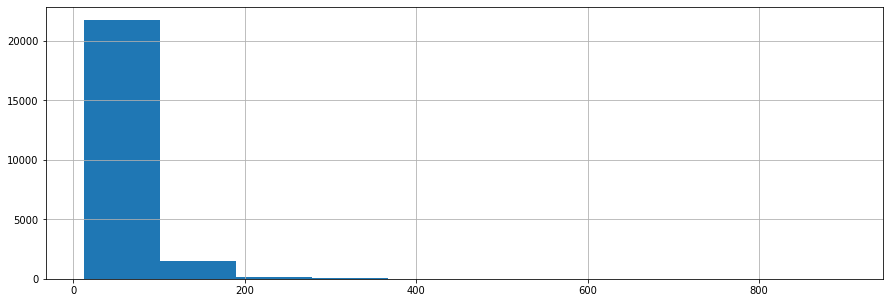

In [440]:
df['total_area'].hist(figsize=(15,5))

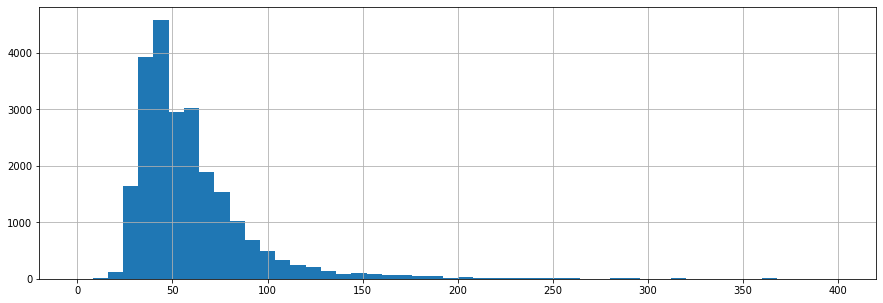

In [441]:
df['total_area'].hist(bins=50, range=(0,400), figsize=(15,5))

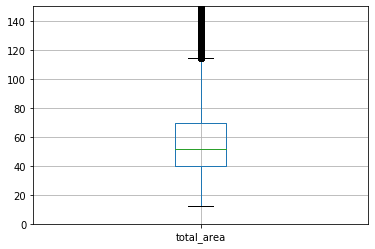

In [442]:
plt.ylim(0,150)
df.boxplot('total_area')
plt.show()

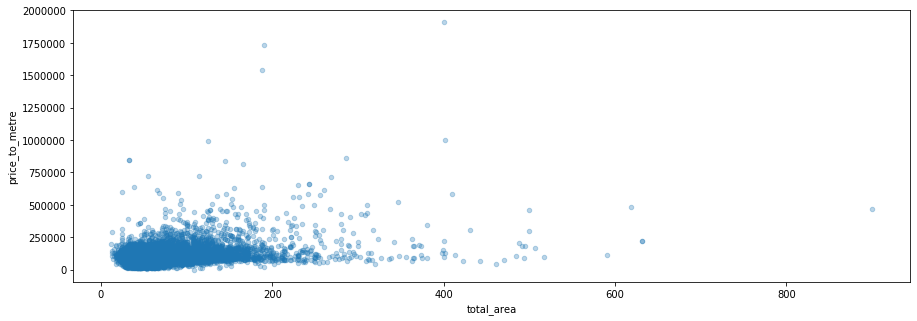

In [443]:
df.plot(kind='scatter', x='total_area', y='price_to_metre', figsize=(15,5), alpha=0.3)

In [444]:
df[df['total_area'] > 200][['last_price','total_area','rooms','price_to_metre','locality_name_new']].sort_values('price_to_metre')

,last_price,total_area,rooms,price_to_metre,locality_name_new
2462,7900000,201.50,7,39205.96,Парголово
20273,20000000,460.80,6,43402.78,Санкт-Петербург
11087,14000000,320.00,6,43750.00,Красное Село
7399,11000000,230.00,5,47826.09,Хязельки
2489,12500000,255.00,3,49019.61,Санкт-Петербург
...,...,...,...,...,...
2536,159984000,242.40,4,660000.00,Санкт-Петербург
8900,190870000,268.00,3,712201.49,Санкт-Петербург
16461,245000000,285.70,6,857542.88,Санкт-Петербург
14706,401300000,401.00,5,1000748.13,Санкт-Петербург


In [445]:
df[df['total_area'] > 200][['last_price','total_area','rooms','price_to_metre','locality_name_new']].describe()

,last_price,total_area,rooms,price_to_metre
count,226.00,226.00,226.00,226.00
mean,59904411.02,284.61,5.80,201353.89
std,74375914.43,96.06,2.22,195622.59
min,7900000.00,200.30,1.00,39205.96
25%,23925000.00,222.15,5.00,89190.50
50%,35000000.00,250.00,5.00,127465.10
75%,68000000.00,309.93,7.00,235253.44
max,763000000.00,900.00,19.00,1907500.00


In [446]:
df.pivot_table(index='rooms_cat', values=('total_area','price_to_metre'), aggfunc=('count','median','min','max'))

price_to_metre                               total_area         \
                   count        max    median      min      count    max   
rooms_cat                                                                  
1                   8198  848484.85 100000.00 11000.00       8198 494.10   
2                   7897 1542604.80  92807.42   111.83       7897 196.00   
3                   5779 1736842.11  88970.59 10507.25       5779 363.10   
4                   1172  995983.94  92540.22 13483.15       1172 500.00   
4+                   519 1907500.00  99642.31 14347.83        519 900.00   

                        
          median   min  
rooms_cat               
1          36.30 12.00  
2          53.00 20.00  
3          72.80 40.10  
4          99.30 42.00  
4+        165.00 40.00

In [447]:
df[df['price_to_metre'] > 800000][['last_price','total_area','rooms','price_to_metre','locality_name_new']]

,last_price,total_area,rooms,price_to_metre,locality_name_new
1436,330000000,190.00,3,1736842.11,Санкт-Петербург
4859,28000000,33.00,1,848484.85,Санкт-Петербург
4996,124000000,124.50,4,995983.94,Санкт-Петербург
12971,763000000,400.00,7,1907500.00,Санкт-Петербург
14706,401300000,401.00,5,1000748.13,Санкт-Петербург
16461,245000000,285.70,6,857542.88,Санкт-Петербург
16647,122000000,145.00,3,841379.31,Санкт-Петербург
17172,28000000,33.00,1,848484.85,Санкт-Петербург
17912,135000000,166.00,3,813253.01,Санкт-Петербург
22831,289238400,187.50,2,1542604.80,Санкт-Петербург


In [448]:
df.loc[[4859,17172]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,locality_name_new,price_to_metre,weekday_exposition,month_exposition,year_exposition,month_year_exp,floor_cat,living_%,kitchen_%
4859,16,28000000,33.00,2019-04-29,1,3.50,5,nan,2,False,...,6.61,Санкт-Петербург,848484.85,0,4,2019,2019-04-01,средний этаж,0.58,0.20
17172,14,28000000,33.00,2019-04-30,1,3.50,5,nan,2,False,...,6.61,Санкт-Петербург,848484.85,1,4,2019,2019-04-01,средний этаж,0.58,0.20


In [449]:
df[(df['price_to_metre'] < 40000) & (df['locality_name_new'] == 'Санкт-Петербург')][['last_price','total_area','rooms','price_to_metre','locality_name_new']]

,last_price,total_area,rooms,price_to_metre,locality_name_new
2520,2300000,65.00,3,35384.62,Санкт-Петербург
3325,3500000,94.00,3,37234.04,Санкт-Петербург
4248,1200000,49.10,4,24439.92,Санкт-Петербург
4903,3500000,94.00,3,37234.04,Санкт-Петербург
7756,4390000,151.80,6,28919.63,Санкт-Петербург
8646,3500000,94.00,3,37234.04,Санкт-Петербург
8793,12190,109.00,2,111.83,Санкт-Петербург
13739,2100000,80.00,4,26250.00,Санкт-Петербург
17753,1800000,117.30,5,15345.27,Санкт-Петербург
19952,2200000,138.70,4,15861.57,Санкт-Петербург


In [450]:
df = df[df['last_price'] > 13000]

In [451]:
df[(df['rooms'] == 1) & (df['total_area'] > 100)][['last_price','total_area','rooms','price_to_metre','locality_name_new']]

,last_price,total_area,rooms,price_to_metre,locality_name_new
567,9300000,106.90,1,86997.19,Санкт-Петербург
1430,13605800,106.30,1,127994.36,Санкт-Петербург
6944,14400000,100.70,1,142999.01,Санкт-Петербург
8261,36000000,123.20,1,292207.79,Санкт-Петербург
9826,43185328,494.10,1,87402.00,Санкт-Петербург
10253,13800000,103.40,1,133462.28,Санкт-Петербург
13023,11000000,127.30,1,86410.05,Санкт-Петербург
14210,43511000,122.08,1,356413.83,Санкт-Петербург
19392,71000000,371.00,1,191374.66,Санкт-Петербург
21338,3200000,190.00,1,16842.11,Санкт-Петербург


In [452]:
df.loc[(df['rooms'] == 1) & (df['total_area'] > 300), 'total_area'] = np.nan
df.dropna(subset=['total_area'], inplace=True)

In [453]:
df['last_price'].describe()

count       23562.00
mean      6536044.28
std      10900847.68
min        430000.00
25%       3400000.00
50%       4646000.00
75%       6790000.00
max     763000000.00
Name: last_price, dtype: float64

Text(0.5, 1.0, 'last_price')

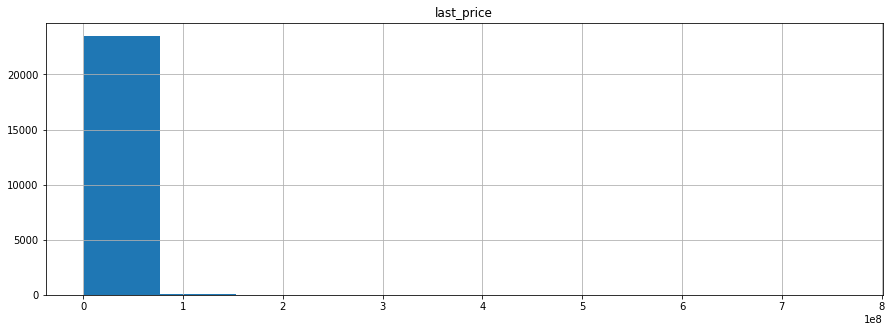

In [454]:
df['last_price'].hist(figsize=(15,5))
plt.title('last_price')

Text(0.5, 1.0, 'last_price')

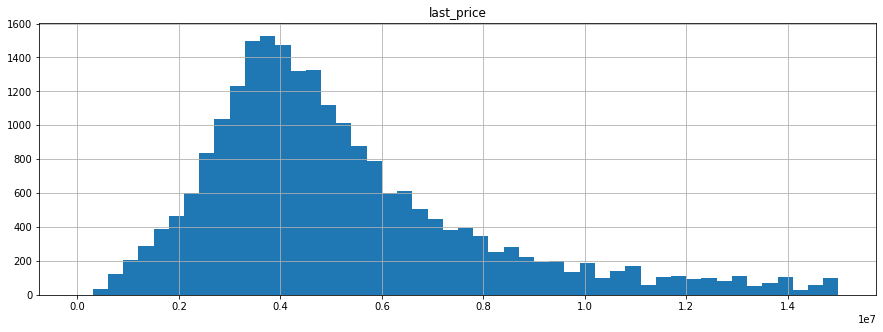

In [455]:
df['last_price'].hist(bins=50, range=(0,15000000), figsize=(15,5))
plt.title('last_price')

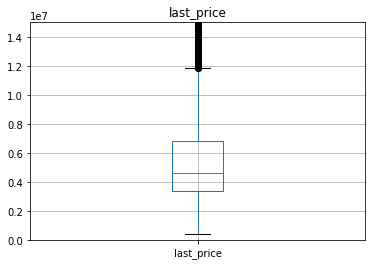

In [456]:
plt.ylim(0,15000000)
df.boxplot('last_price')
plt.title('last_price')
plt.show()

In [457]:
df[df['last_price'] > 200000000][['last_price','total_area','rooms','price_to_metre','locality_name_new','cityCenters_nearest']].sort_values('price_to_metre', ascending=False)

,last_price,total_area,rooms,price_to_metre,locality_name_new,cityCenters_nearest
12971,763000000,400.00,7,1907500.00,Санкт-Петербург,3956.00
1436,330000000,190.00,3,1736842.11,Санкт-Петербург,1197.00
22831,289238400,187.50,2,1542604.80,Санкт-Петербург,1073.00
14706,401300000,401.00,5,1000748.13,Санкт-Петербург,2389.00
16461,245000000,285.70,6,857542.88,Санкт-Петербург,6235.00
13749,240000000,410.00,6,585365.85,Санкт-Петербург,5297.00
15651,300000000,618.00,7,485436.89,Санкт-Петербург,5297.00
19540,420000000,900.00,12,466666.67,Санкт-Петербург,7877.00
5893,230000000,500.00,6,460000.00,Санкт-Петербург,5297.00


Text(0.5, 1.0, 'rooms')

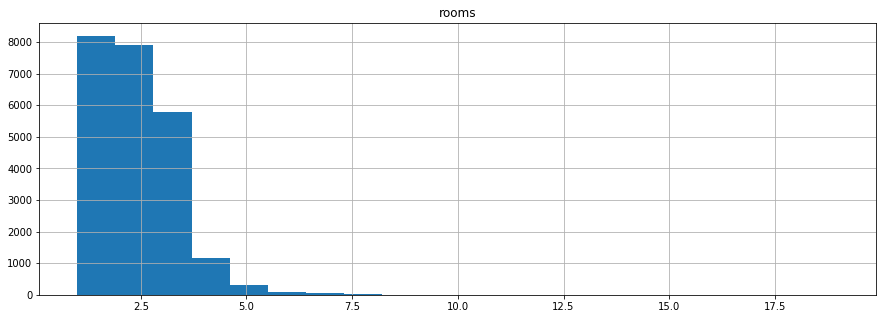

In [458]:
df['rooms'].hist(bins=20, figsize=(15,5), range=(1,19))
plt.title('rooms')

In [459]:
df['rooms'].value_counts(normalize=True).head()

1   0.35
2   0.34
3   0.25
4   0.05
5   0.01
Name: rooms, dtype: float64

In [460]:
df['ceiling_height'].describe()

count   14478.00
mean        2.73
std         0.28
min         2.00
25%         2.52
50%         2.65
75%         2.80
max         6.00
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'ceiling_height')

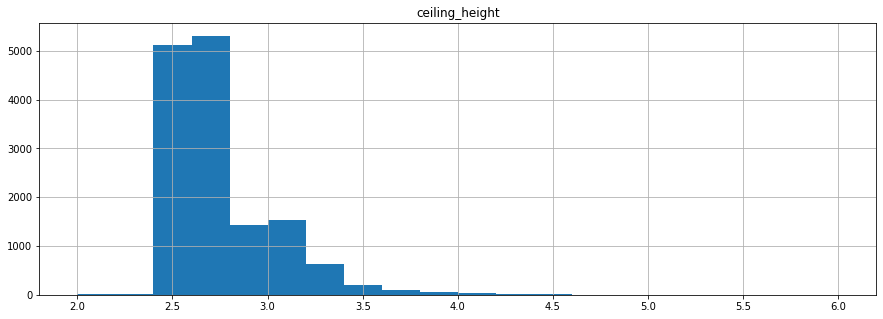

In [461]:
df['ceiling_height'].hist(bins=20, figsize=(15,5), range=(2,6))
plt.title('ceiling_height')

In [462]:
df['price_to_metre'].describe()

count     23562.00
mean      99406.66
std       50384.87
min        7962.96
25%       76566.26
50%       95000.00
75%      114213.20
max     1907500.00
Name: price_to_metre, dtype: float64

Text(0.5, 1.0, 'price_to_metre')

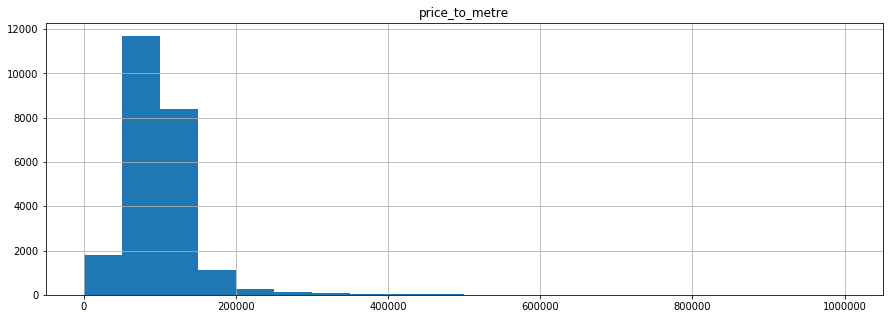

In [463]:
df['price_to_metre'].hist(bins=20, figsize=(15,5), range=(0,1000000))
plt.title('price_to_metre')

In [464]:
df['days_exposition'].describe()

count   20391.00
mean      180.76
std       219.74
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'days_exposition')

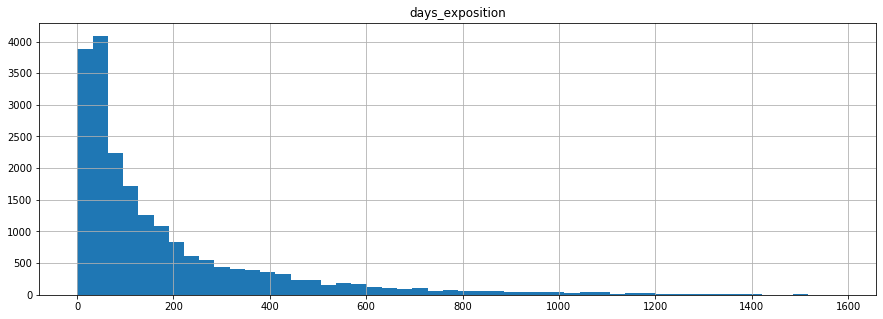

In [465]:
df['days_exposition'].hist(bins=50, figsize=(15,5))
plt.title('days_exposition')

Text(0.5, 1.0, 'days_exposition')

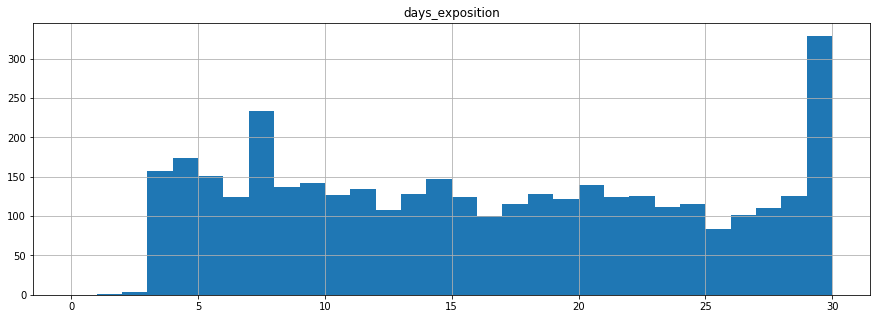

In [466]:
df['days_exposition'].hist(bins=30, figsize=(15,5), range=(0,30))
plt.title('days_exposition')

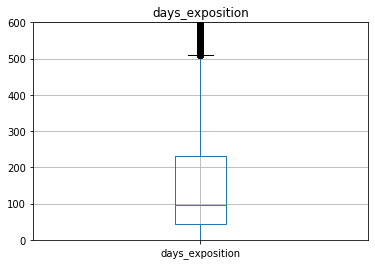

In [467]:
plt.ylim(0,600)
df.boxplot('days_exposition')
plt.title('days_exposition')
plt.show()

### Выводы

У большей части продаваемых квартир площадь находится в диапозоне от 30 до 100 квадратных метров, хотя есть квартиры с площадью  и 12 кв.м. и 900 кв. метров. Высота потолков обычно находится в диаопзоне 2.5-3.2 метров (выбросы были устранены на этапе предобработки данных). Абсолютное большинство квартир находится в диапозоне площади квартиры до 200 квадратных метров и стоимость за квадрат редко превышает 200 тыс.руб. Цена большинства квартир находится в диапозоне 2000 т.р. - 7000 т.р. При этом есть очень дорогие квартиры, стоимостью сотни миллионов рублей, при этом считать эти данные некорректными нет, существование недвижимости с большой площадью и высокой ценой в центре второго по величине города в России допустимо.

Отдельно мы посмотрели квартиры с площадью более 200 квадратных метров на предмет того, не ошибся ли пользователь с количеством нулей при вводе значения площади квартиры. Посколько минимальная цена за квадратный метр для квартир с площадью 200 кв.м. и более начинается от 40 тыс.рублей за кв.м. можно предположить, что значение площади квартиры введено корректно. При этом среди однокомнатных квартир есь квартиры площадью 371 кв.м. и 494 кв.м. со стоимостью 71 млн и 43.2 млн. Предположительно пользователь некорректно указал количество комнат. Чтобы данные объявления не мешали дальнейшему анализу исключим их из выборки. Также в ходе анализа была выявлена квартира со стоимостью 12190 рублей, также исключаем данное объявление.

Кроме того была выявлена еще одна потенциальная проблема: в исходной выборке есть задваивающиеся объявления (например одна и таже квартира высталена на продажу в разные дни), при этом строки не полностью одинаковые, методом drop_duplicates их не удалить.

Среднее время продажи квартир составляет пол года, при этом медианное значение всего 3 месяца. Такое смещение средней от медианы обусловлено наличием квартир с большим сроком экспозиции, есть квартиры, которые продавались более 4-х лет. В целом можно сказать что абсолютное большинство квартир продается в течении 9 месяцев. Есть пользователи, которым удалось продать свою недвижимость в очень короткий срок, всего за 1-3 дня, долгой можное считать продажи, которые выходят за пределы верхнего "уса" boxplot - продажи продолжительностью более 1,5 лет.

### Анализ зависимости цены квартиры от характеристик объекта недвижимости

In [468]:
df['total_area_cat'] = pd.cut(df['total_area'], [0,30,40,50,70,90,120,900])

Text(0.5, 1.0, 'total_area - last-price')

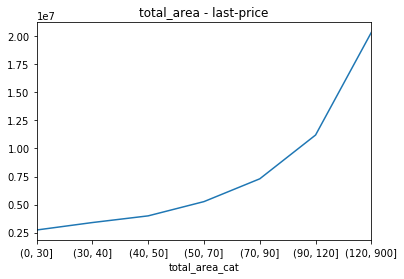

In [469]:
df.groupby('total_area_cat')['last_price'].median().plot()
plt.title('total_area - last-price')

In [470]:
df['last_price'].corr(df['total_area'])

0.6535185541272875

Text(0.5, 1.0, 'total_area - price_to_metre')

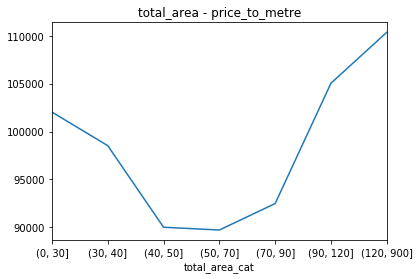

In [471]:
df[df['price_to_metre'] < 200000].groupby('total_area_cat')['price_to_metre'].median().plot()
plt.title('total_area - price_to_metre')

Text(0.5, 1.0, 'rooms - last_price')

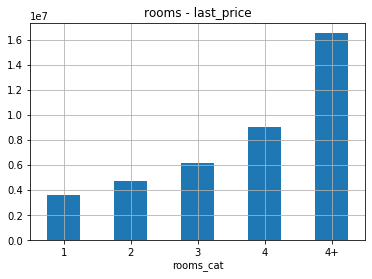

In [472]:
df.groupby('rooms_cat')['last_price'].median().plot(kind='bar', rot=0, grid=True)
plt.title('rooms - last_price')

Text(0.5, 1.0, 'rooms - price_to_metre')

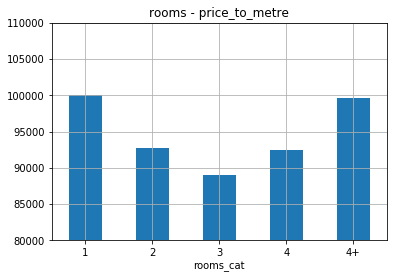

In [473]:
df.groupby('rooms_cat')['price_to_metre'].median().plot(kind='bar', rot=0, grid=True)
plt.ylim(80000,110000)
plt.title('rooms - price_to_metre')

Между площадью квартиры и ее стоимостью существует экспоненциальная зависимость, что логично поскольку цена это произведение площади квартиры на стоимость квадратного метра. При этом стоимость квадратного метра постепенно снижается с увеличением площади квартиры. Так для небольших квартир площадью до 30 кв.м. цена за квадратный метр составлят 102 тыс. за кв.м. и падает до 90 тыс.руб. за кв.м. для квартир площадью 50-70 кв.метров, при этом при дальнейшем увеличении площади стоимость квадратного метра существенно возрастает, особенно после превышения площади в 90 кв.м.

Аналогичную динамику мы надлюдаем если проследим взаимосвязь цены квартиры и количества комнат. Чем больше комнат тем дороже стоит квартира. При этом по цене за квадратный метр наиболее дорогие это 1-комнатные квартиры, наиболее дешевые 3-х комнатные.

In [474]:
df['cityCenters_nearest'].describe()

count    21013.00
mean     19831.11
std      25766.22
min        181.00
25%      10330.00
50%      14000.00
75%      19000.00
max     180000.00
Name: cityCenters_nearest, dtype: float64

In [475]:
df['cityCenters_nearest_cat'] = pd.cut(df['cityCenters_nearest'], [0,5000,10000,13000,15000,20000,30000,180000])
df['cityCenters_nearest_cat'].value_counts()

(15000, 20000]     3923
(10000, 13000]     3831
(13000, 15000]     3364
(5000, 10000]      2997
(30000, 180000]    2432
(20000, 30000]     2406
(0, 5000]          2060
Name: cityCenters_nearest_cat, dtype: int64

Text(0.5, 1.0, 'cityCenters_nearest_cat - last-price')

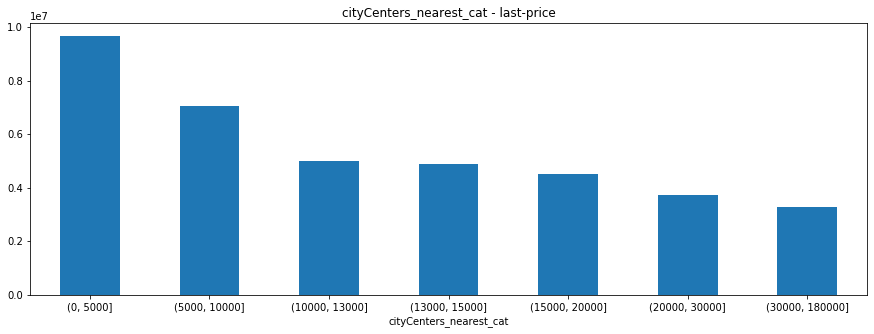

In [476]:
df.groupby('cityCenters_nearest_cat')['last_price'].median().plot(kind='bar',figsize=(15,5), rot=0)
plt.title('cityCenters_nearest_cat - last-price')

Text(0.5, 1.0, 'cityCenters_nearest_cat - price_to_metre')

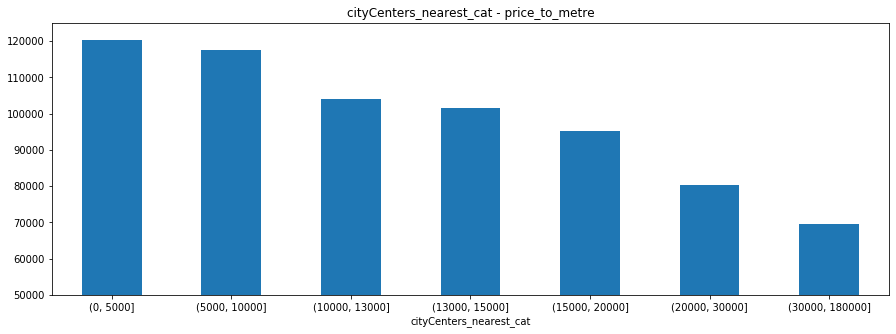

In [477]:
df.groupby('cityCenters_nearest_cat')['price_to_metre'].median().plot(kind='bar',figsize=(15,5), rot=0)
plt.ylim(50000,125000)
plt.title('cityCenters_nearest_cat - price_to_metre')

Text(0.5, 1.0, 'cityCenters_nearest_cat - total_area')

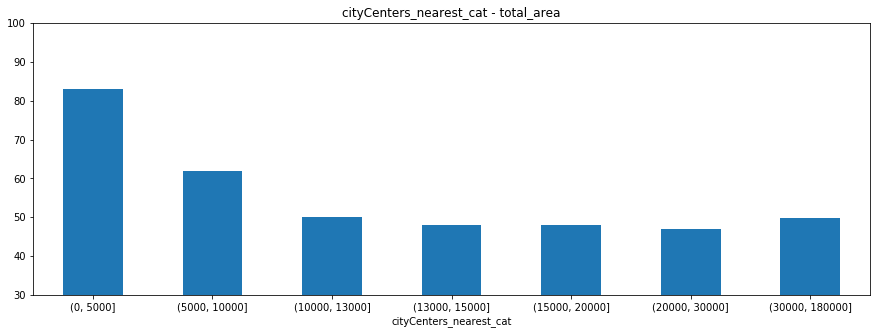

In [478]:
df.groupby('cityCenters_nearest_cat')['total_area'].median().plot(kind='bar',figsize=(15,5), rot=0)
plt.ylim(30,100)
plt.title('cityCenters_nearest_cat - total_area')

Чем дальше от центра гордода, тем дешевле становятся квартиры, что обусловлено аналогичной тенденцией показателей стоимости за квадратный метр и площади квартиры.

Text(0.5, 1.0, 'floor - last-price')

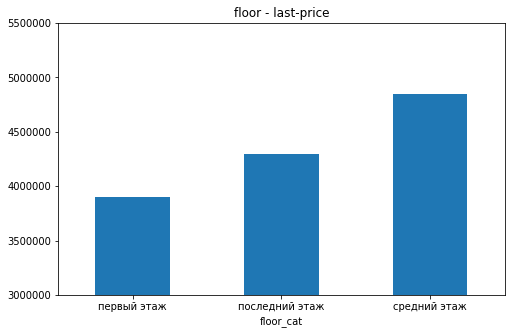

In [479]:
df.groupby('floor_cat')['last_price'].median().plot(kind='bar',figsize=(8,5), rot=0)
plt.ylim(3000000,5500000)
plt.title('floor - last-price')

In [480]:
df.groupby('floor_cat')['last_price'].median()

floor_cat
первый этаж       3900000
последний этаж    4300000
средний этаж      4846500
Name: last_price, dtype: int64

Text(0.5, 1.0, 'floor - price_to_metre')

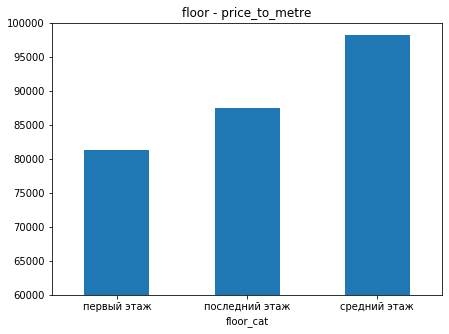

In [481]:
df.groupby('floor_cat')['price_to_metre'].median().plot(kind='bar',figsize=(7,5), rot=0)
plt.ylim(60000,100000)
plt.title('floor - price_to_metre')

In [482]:
df.groupby('floor_cat')['price_to_metre'].median()

floor_cat
первый этаж      81321.37
последний этаж   87495.67
средний этаж     98288.07
Name: price_to_metre, dtype: float64

Самые дешёвые квартиры расположены на 1 этаже. Их цена примерно на 17% ниже стоимости квартирына средних этажах. Квартиры на последних этажа в среднем на 11% дешевле, чем квартиры на средних этажах.

In [483]:
df['ceiling_height_cat'] = pd.cut(df['ceiling_height'], [0,2.5,2.6,2.7,2.8,3.0,3.2,6.0])
df['ceiling_height_cat'].value_counts()

(0.0, 2.5]    3585
(2.5, 2.6]    3207
(2.6, 2.7]    2468
(2.7, 2.8]    2182
(2.8, 3.0]    1541
(3.2, 6.0]     785
(3.0, 3.2]     710
Name: ceiling_height_cat, dtype: int64

Text(0.5, 1.0, 'ceiling_height - last-price')

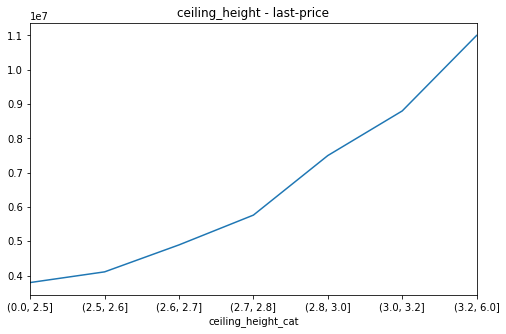

In [484]:
df.groupby('ceiling_height_cat')['last_price'].median().plot(figsize=(8,5), rot=0)
plt.title('ceiling_height - last-price')

Text(0.5, 1.0, 'ceiling_height - price_to_metre')

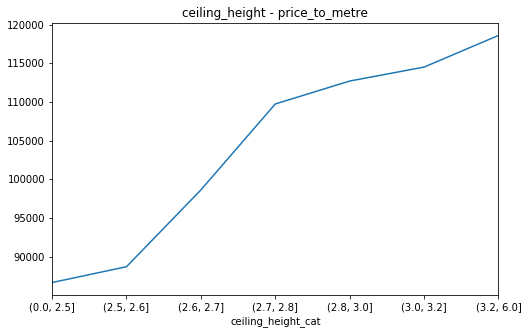

In [485]:
df.groupby('ceiling_height_cat')['price_to_metre'].median().plot(figsize=(8,5), rot=0)
plt.title('ceiling_height - price_to_metre')

Text(0.5, 1.0, 'ceiling_height - total_area')

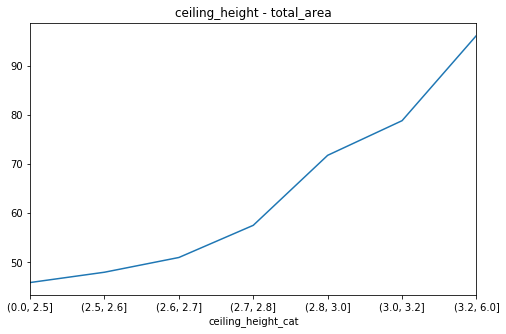

In [486]:
df.groupby('ceiling_height_cat')['total_area'].median().plot(figsize=(8,5), rot=0)
plt.title('ceiling_height - total_area')

Квартиры с высоким потолком ценятся на рынке гораздо выше квартир с низким потолком. При этом чем больше по площади квартира, тем выше вероятность, что у нее более высокий потолок.

In [487]:
df['parks'] = (df['parks_nearest'] > 0) & (df['parks_nearest'] < 1000)
df['ponds'] = (df['ponds_nearest'] > 0) & (df['ponds_nearest'] < 1000)
df['parks_ponds'] = (df['parks'] == True) | (df['ponds'] == True)

Text(0.5, 1.0, 'parks - price_to_metre')

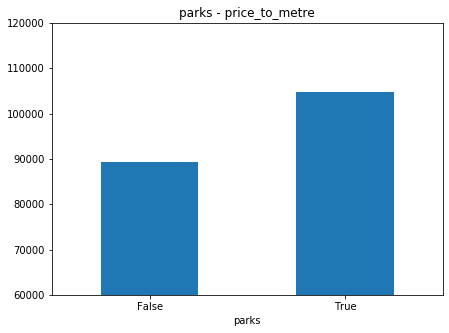

In [488]:
df.groupby('parks')['price_to_metre'].median().plot(kind='bar',figsize=(7,5), rot=0)
plt.ylim(60000,120000)
plt.title('parks - price_to_metre')

In [489]:
df.groupby('parks')['price_to_metre'].median()

parks
False    89282.20
True    104838.71
Name: price_to_metre, dtype: float64

Text(0.5, 1.0, 'ponds - price_to_metre')

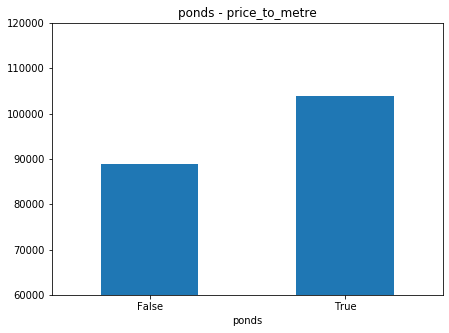

In [490]:
df.groupby('ponds')['price_to_metre'].median().plot(kind='bar',figsize=(7,5), rot=0)
plt.ylim(60000,120000)
plt.title('ponds - price_to_metre')

In [491]:
df.groupby('ponds')['price_to_metre'].median()

ponds
False    88794.93
True    103875.97
Name: price_to_metre, dtype: float64

Text(0.5, 1.0, 'parks_ponds - price_to_metre')

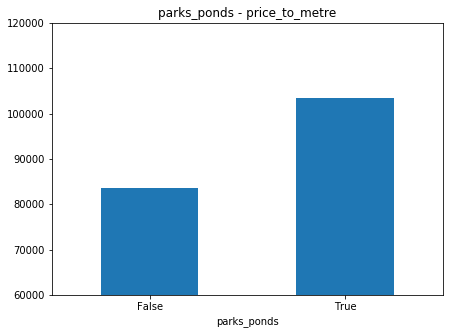

In [492]:
df.groupby('parks_ponds')['price_to_metre'].median().plot(kind='bar',figsize=(7,5), rot=0)
plt.ylim(60000,120000)
plt.title('parks_ponds - price_to_metre')

In [493]:
df.groupby('parks_ponds')['price_to_metre'].median()

parks_ponds
False    83624.34
True    103532.82
Name: price_to_metre, dtype: float64

Наличие в пешей доступности (в радиусе 1000 метров) увеличивает стоимость квартиры на 19%.

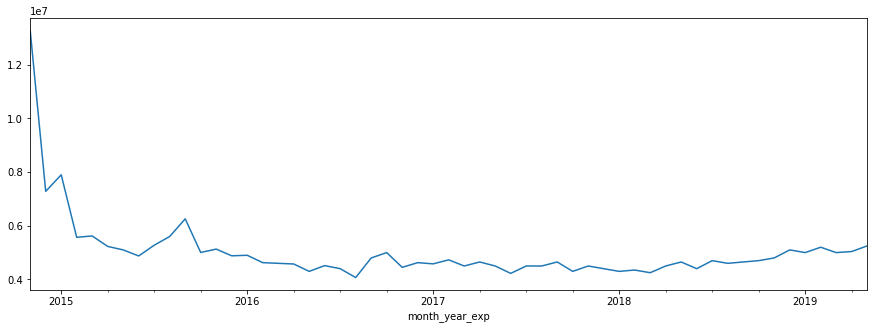

In [494]:
df.groupby('month_year_exp')['last_price'].median().plot(figsize=(15,5))

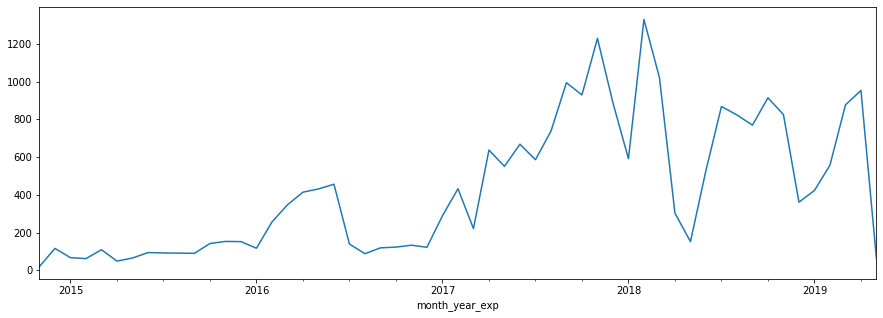

In [495]:
df.groupby('month_year_exp')['last_price'].count().plot(figsize=(15,5))

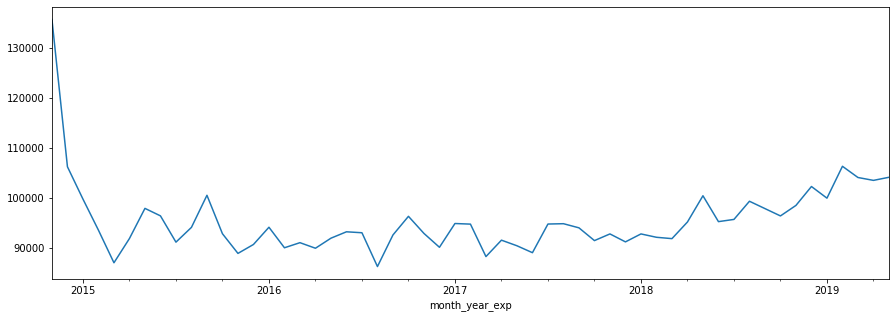

In [496]:
df.groupby('month_year_exp')['price_to_metre'].median().plot(figsize=(15,5))

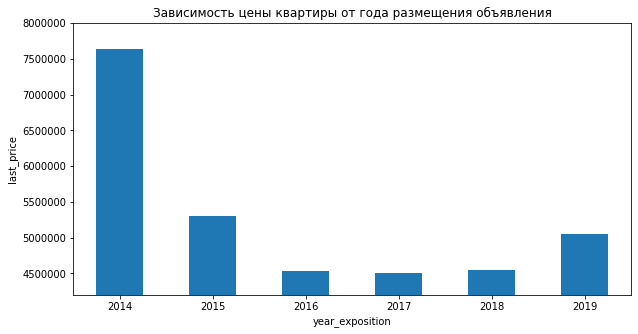

In [497]:
df.groupby('year_exposition')['last_price'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.ylim(4200000,8000000)
plt.title('Зависимость цены квартиры от года размещения объявления')
plt.ylabel('last_price')
plt.show()

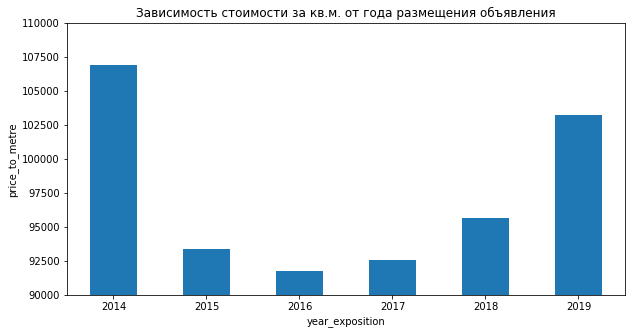

In [498]:
df.groupby('year_exposition')['price_to_metre'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.ylim(90000,110000)
plt.title('Зависимость стоимости за кв.м. от года размещения объявления')
plt.ylabel('price_to_metre')
plt.show()

Начиная с 2017 года стоимость недвижимости растет. В конце 2014 начале 2015 года был пик по стоимости квартир, но он обусловлен тем, что объявлений было размещено очень мало (сервис только запускался), отдельны выбросы сильно влияли на среднюю цену.

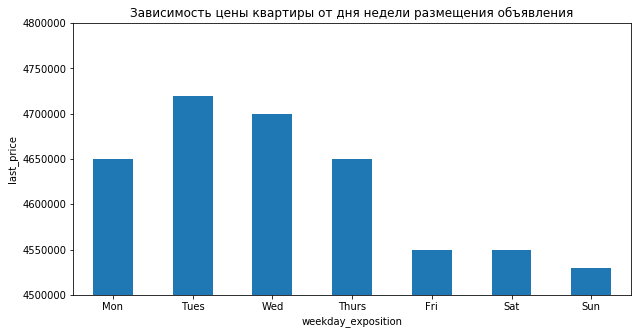

In [499]:
df.groupby('weekday_exposition')['last_price'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylim(4500000,4800000)
plt.title('Зависимость цены квартиры от дня недели размещения объявления')
plt.ylabel('last_price')
plt.show()

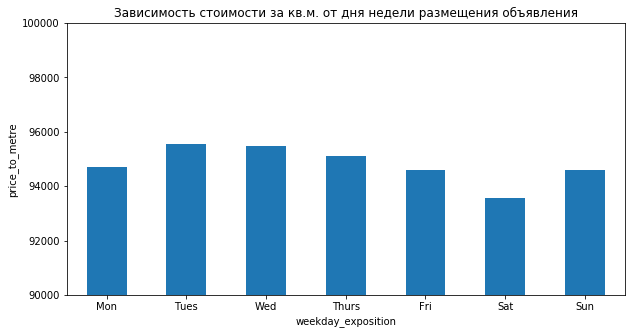

In [500]:
df.groupby('weekday_exposition')['price_to_metre'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylim(90000,100000)
plt.title('Зависимость стоимости за кв.м. от дня недели размещения объявления')
plt.ylabel('price_to_metre')
plt.show()

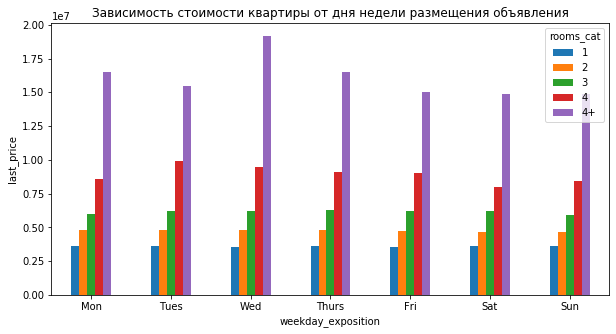

In [501]:
df.pivot_table(index='weekday_exposition', columns=['rooms_cat'], values='last_price', aggfunc='median').plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('Зависимость стоимости квартиры от дня недели размещения объявления')
plt.ylabel('last_price')
plt.show()

In [502]:
df.pivot_table(index='weekday_exposition', columns=['rooms_cat'], values='last_price', aggfunc='median')

rooms_cat,1,2,3,4,4+
weekday_exposition,,,,,
0,3600000,4778000,6000000,8590000,16500000
1,3590000,4800000,6200000,9900000,15500000
2,3550000,4800000,6200000,9500000,19163500
3,3594500,4782500,6300000,9100000,16500000
4,3550000,4750000,6200000,9000000,15000000
5,3590000,4640000,6200000,7995000,14895000
6,3597500,4630000,5900000,8450000,14900000


В будние дни стоимость размещенныъ квартир выше чем в выходные дни, такая динамика обусловлена тем, что в будние дни выставляются дорогие квартиры с большой площадью и ценой (реализацией таких квартир занимаются в основном агентства недвижимости, которые в выходные дни могут не работать).

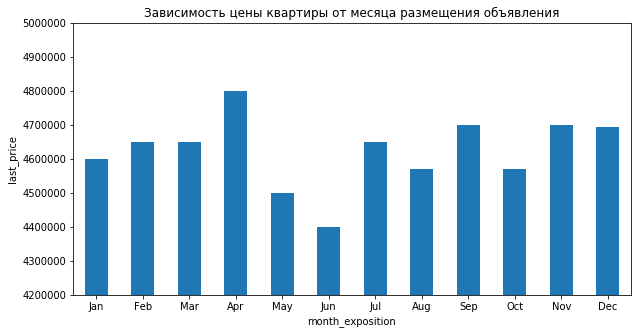

In [503]:
df.groupby('month_exposition')['last_price'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(4200000,5000000)
plt.title('Зависимость цены квартиры от месяца размещения объявления')
plt.ylabel('last_price')
plt.show()

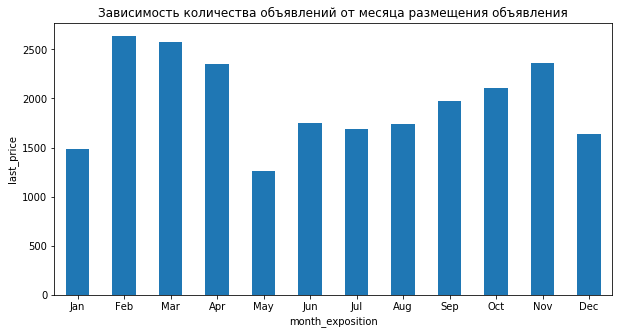

In [504]:
df.groupby('month_exposition')['last_price'].count().plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.ylim(4200000,5000000)
plt.title('Зависимость количества объявлений от месяца размещения объявления')
plt.ylabel('last_price')
plt.show()

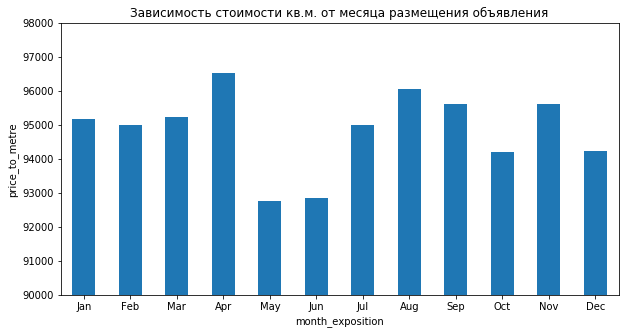

In [505]:
df.groupby('month_exposition')['price_to_metre'].median().plot(kind='bar', figsize=(10,5), rot=0)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(90000,98000)
plt.title('Зависимость стоимости кв.м. от месяца размещения объявления')
plt.ylabel('price_to_metre')
plt.show()

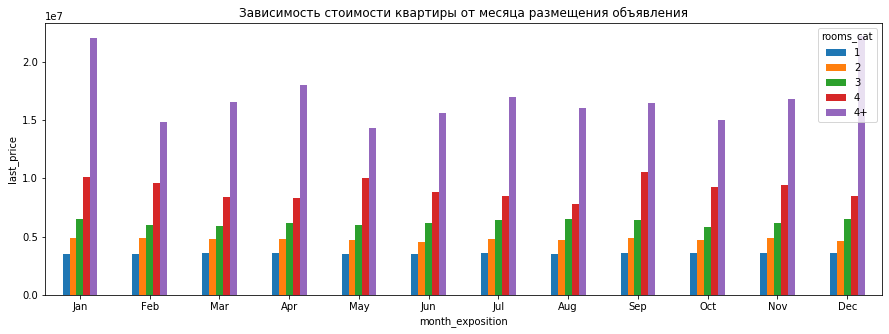

In [506]:
df.pivot_table(index='month_exposition', columns=['rooms_cat'], values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,5), rot=0)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Зависимость стоимости квартиры от месяца размещения объявления')
plt.ylabel('last_price')
plt.show()

In [507]:
df.pivot_table(index='month_exposition', columns=['rooms_cat'], values='last_price', aggfunc='median')

rooms_cat,1,2,3,4,4+
month_exposition,,,,,
1,3500000,4900000,6500000,10100000,22000000
2,3500000,4890000,6000000,9600000,14845000
3,3600000,4750000,5900000,8400000,16500000
4,3600000,4800000,6170000,8290000,18000000
5,3500000,4700000,5999500,10000000,14300000
6,3494500,4500000,6200000,8820000,15600000
7,3600000,4800000,6450000,8500000,17000000
8,3540000,4725000,6540000,7750000,16000000
9,3570000,4850000,6400000,10575000,16445000


Наибольшее количество объявлений размещается в период февраль-апрель и сентябрь-ноябрь. В месяцы с продолжительными прездниками (январь, май), а также в декабре активность на рынке падает. Наиболее дешевые квартиры в мае-июне, наиболее дорогие в апреле.

Выбираем TOP 10 городов по количеству объявлений

In [508]:
df_top10 = df.groupby('locality_name_new')['last_price'].count().to_frame().sort_values('last_price', ascending=False).head(10)
df_top10

,last_price
locality_name_new,
Санкт-Петербург,15648
Мурино,586
Кудрово,470
Шушары,439
Всеволожск,398
Пушкин,369
Колпино,338
Парголово,327
Гатчина,307


In [509]:
df['city_top10'] = df['locality_name_new'].where(df['locality_name_new'].isin(df_top10.index), 'Прочие')
df['city_top10'].value_counts()

Санкт-Петербург    15648
Прочие              4443
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: city_top10, dtype: int64

In [510]:
(df[df['city_top10'] != 'Прочие']
            .pivot_table(index='city_top10', values=['price_to_metre','cityCenters_nearest'], aggfunc='median')
            .sort_values('price_to_metre', ascending=False)
)

,cityCenters_nearest,price_to_metre
city_top10,,
Санкт-Петербург,12242.50,104782.48
Пушкин,27930.50,100000.00
Кудрово,14000.00,95555.31
Парголово,19311.00,91642.86
Мурино,21000.00,86250.38
Шушары,24212.00,76829.27
Колпино,32018.00,74723.75
Гатчина,47000.00,67796.61
Всеволожск,25000.00,65789.47


Самая высокая цена квадратного метра в Санкт_Петербурге, самая низкая в Выборге.

In [511]:
df_spb = df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'].notna())]

In [512]:
df_spb['km'] = np.floor((df_spb['cityCenters_nearest'] / 1000))

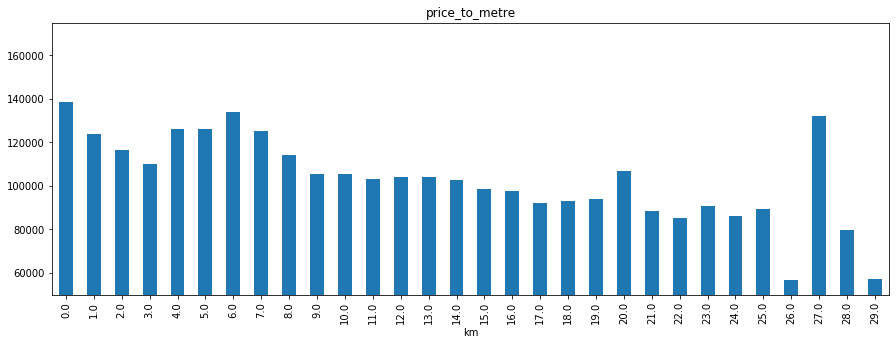

In [513]:
df_spb.groupby('km')['price_to_metre'].median().plot(kind='bar', figsize=(15,5))
plt.title('price_to_metre')
plt.ylim(50000,175000)
plt.show()

Центром города можно считать район в радиусе 8 км, поскольку после удалености на расстояние более 8 км цена квадратного метра заметно падает.

In [514]:
df_spb_centr = df_spb[df_spb['km'] <= 8]

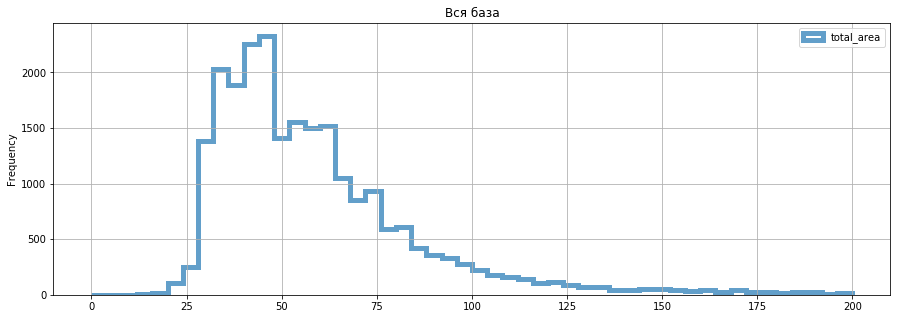

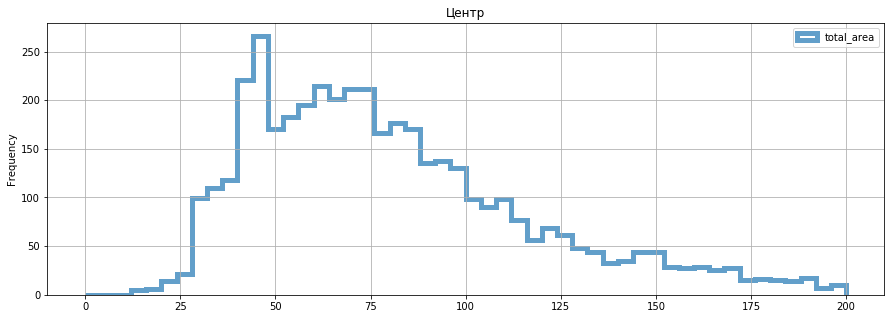

In [515]:
df.plot(kind='hist', histtype='step', y='total_area', bins=50, range=(0,200), figsize=(15,5), linewidth=5, alpha=0.7, title='Вся база', grid=True)
plt.show()
df_spb_centr.plot(kind='hist', histtype='step', y='total_area', bins=50, range=(0,200), figsize=(15,5), linewidth=5, alpha=0.7, title='Центр', grid=True)
plt.show()

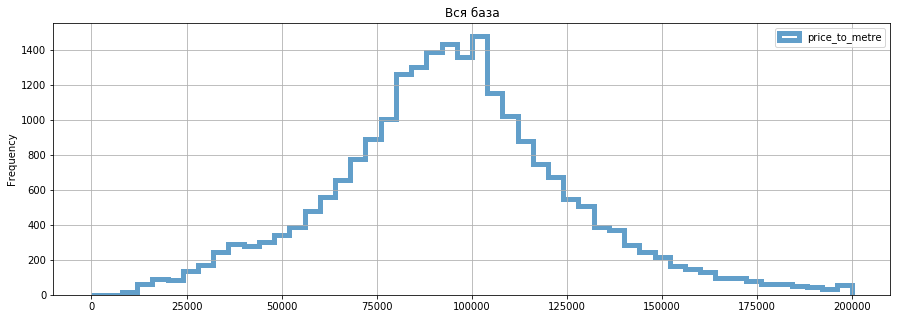

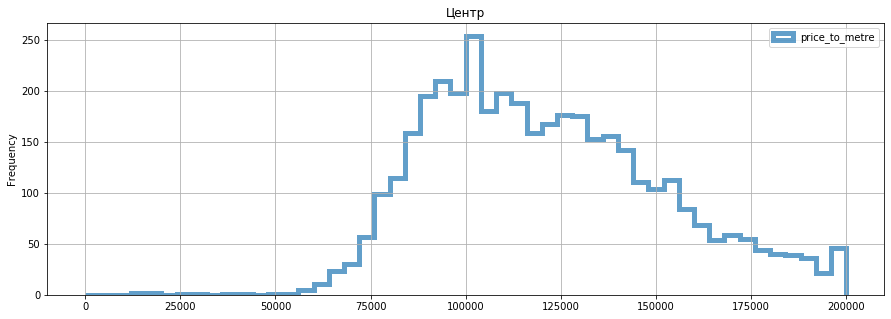

In [516]:
df.plot(kind='hist', histtype='step', y='price_to_metre', bins=50, range=(0,200000), figsize=(15,5), linewidth=5, alpha=0.7, title='Вся база', grid=True)
plt.show()
df_spb_centr.plot(kind='hist', histtype='step', y='price_to_metre', bins=50, range=(0,200000), figsize=(15,5), linewidth=5, alpha=0.7, title='Центр', grid=True)
plt.show()

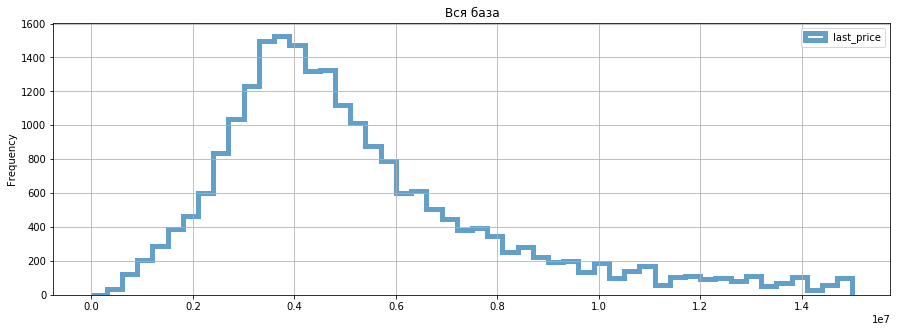

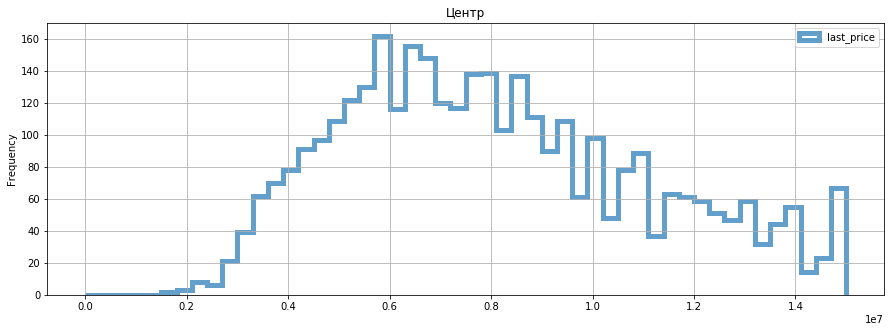

In [517]:
df.plot(kind='hist', histtype='step', y='last_price', bins=50, range=(0,15000000), figsize=(15,5), linewidth=5, alpha=0.7, title='Вся база', grid=True)
plt.show()
df_spb_centr.plot(kind='hist', histtype='step', y='last_price', bins=50, range=(0,15000000), figsize=(15,5), linewidth=5, alpha=0.7, title='Центр', grid=True)
plt.show()

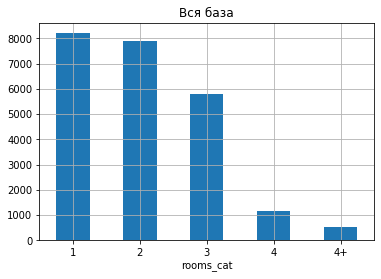

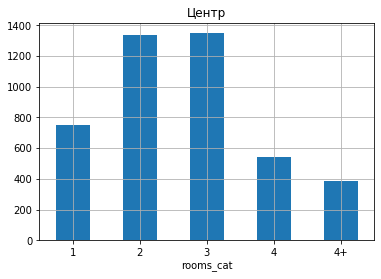

In [518]:
df.groupby('rooms_cat')['price_to_metre'].count().plot(kind='bar', rot=0, grid=True, title='Вся база')
plt.show()
df_spb_centr.groupby('rooms_cat')['price_to_metre'].count().plot(kind='bar', rot=0, grid=True, title='Центр')
plt.show()

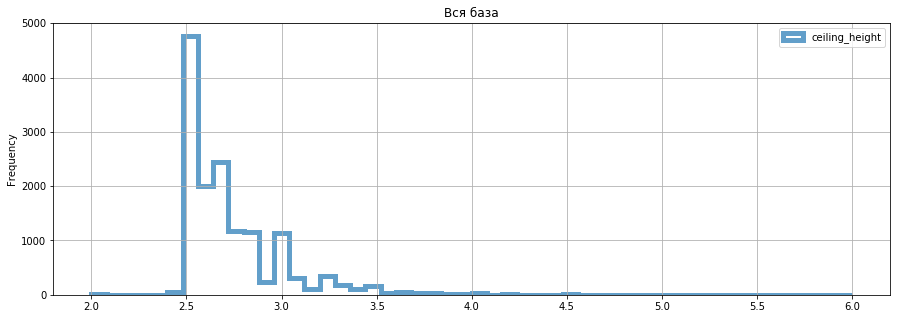

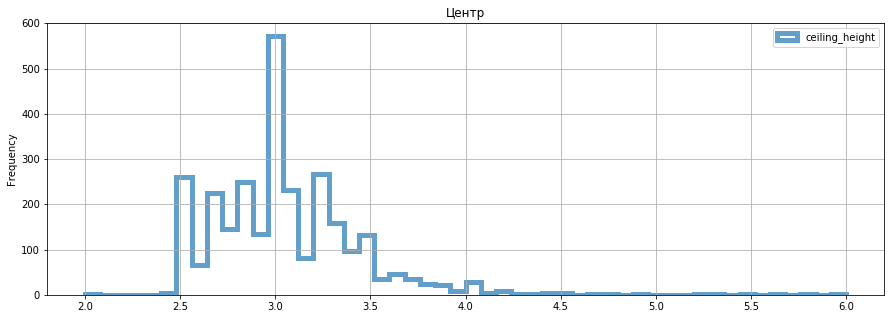

In [519]:
df[df['ceiling_height'] > 0].plot(kind='hist', histtype='step', y='ceiling_height', bins=50, range=(2,6), figsize=(15,5), linewidth=5, alpha=0.7, title='Вся база', grid=True)
plt.show()
df_spb_centr[df_spb_centr['ceiling_height'] > 0].plot(kind='hist', histtype='step', y='ceiling_height', bins=50, range=(2,6), figsize=(15,5), linewidth=5, alpha=0.7, title='Центр', grid=True)
plt.show()

In [520]:
df[['total_area','price_to_metre','last_price','rooms','ceiling_height']].describe()

,total_area,price_to_metre,last_price,rooms,ceiling_height
count,23562.00,23562.00,23562.00,23562.00,14478.00
mean,60.29,99406.66,6536044.28,2.08,2.73
std,35.49,50384.87,10900847.68,1.07,0.28
min,12.00,7962.96,430000.00,1.00,2.00
25%,40.00,76566.26,3400000.00,1.00,2.52
50%,52.00,95000.00,4646000.00,2.00,2.65
75%,69.70,114213.20,6790000.00,3.00,2.80
max,900.00,1907500.00,763000000.00,19.00,6.00


In [521]:
df_spb_centr[['total_area','price_to_metre','last_price','rooms','ceiling_height']].describe()

,total_area,price_to_metre,last_price,rooms,ceiling_height
count,4370.00,4370.00,4370.00,4370.00,2863.00
mean,88.34,140777.39,13742575.98,2.73,3.04
std,57.43,86297.23,22967808.83,1.40,0.38
min,12.00,15345.27,1600000.00,1.00,2.00
25%,53.02,99601.76,6200000.00,2.00,2.80
50%,75.00,122110.32,8700000.00,3.00,3.00
75%,104.30,152065.84,13500000.00,3.00,3.20
max,900.00,1907500.00,763000000.00,19.00,6.00


Площадь квартир в центре города почти в полтора раза больше, чем площадь квартир по всей базе.

Цена за квадратный метр квартиры в центре в среднем на 28% выше, чем во всей базе. На гистограме квартир в центре график существенно смещен в право относительно всей базы, в центре практически отсутствуют квартиры со стоимостью менее 60 тыс.руб. за кв.м., при этом достаточно много квартир со стоимостью более 150 тыс.руб. за кв.м., чего нет во всей базе.

Стоимость квартир в центре на 87% выше, чем стоимость квартир во всей базе, что обусловлено как большей площадью так и более высокой стоимостью за квадратный метр, в сравнении со всей базой.

В центре города преобладают 2-х и 3-х комнатные квартиры, также достаточно много квартир с четыремя комнатами и более, при этом во всей базе преобладают 1-комнатные и 2-х комнатные квартиры. Данный фактор по всей видимости обуславливает более высокую площадь квартир в центре города.

Высота потолков в квартирах в центре города существенно выше, чем во всей базе, если в общей базе преобладают квартиры с высотой потолков 2,5-2,7 метров, то в центре города в квартирах потолки  в основном 3 метра.

In [522]:
df['parks_ponds'].value_counts(normalize=True)

True    0.51
False   0.49
Name: parks_ponds, dtype: float64

In [523]:
df_spb_centr['parks_ponds'].value_counts(normalize=True)

True    0.89
False   0.11
Name: parks_ponds, dtype: float64

Также необходимо отметить, что 89% всех квартир в центре города имеют в пешей доступности парк или водоем, при этом по всей базе процент таких квартир составляет всего 51%.

In [524]:
d1 = df.groupby('rooms_cat')['price_to_metre'].median().to_frame().reset_index()
d2 = df_spb_centr.groupby('rooms_cat')['price_to_metre'].median().to_frame().reset_index()
d3 = d1.merge(d2, on='rooms_cat', how='inner', suffixes=('_all', '_centre'))
d3['%'] = (d3['price_to_metre_centre'] / d3['price_to_metre_all'] - 1)*100
d3

,rooms_cat,price_to_metre_all,price_to_metre_centre,%
0,1,100000.00,135649.55,35.65
1,2,92809.72,123498.00,33.07
2,3,88970.59,116107.89,30.50
3,4,92540.22,109895.05,18.75
4,4+,99642.31,106379.97,6.76


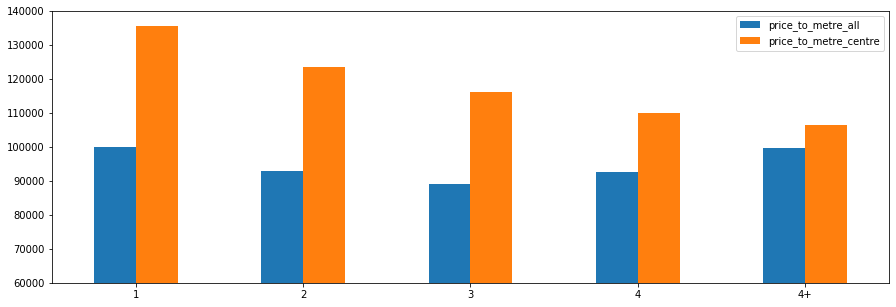

In [525]:
d3[['price_to_metre_all','price_to_metre_centre']].plot(kind='bar', figsize=(15,5), rot=0)
plt.ylim(60000,140000)
plt.gca().set_xticklabels(d3['rooms_cat'])
plt.show()

Наиболее сильный разрыв в стоимости 1 кв.м. между общей базой и центром города наблюдается для однакомнатных квартир. Чем больше комнат в квартире, тем разница меньше.

In [526]:
d1 = df.groupby('floor_cat')['price_to_metre'].median().to_frame().reset_index()
d2 = df_spb_centr.groupby('floor_cat')['price_to_metre'].median().to_frame().reset_index()
d3 = d1.merge(d2, on='floor_cat', how='inner', suffixes=('_all', '_centre'))
d3['%'] = (d3['price_to_metre_centre'] / d3['price_to_metre_all'] - 1)*100
d3

,floor_cat,price_to_metre_all,price_to_metre_centre,%
0,первый этаж,81321.37,106670.65,31.17
1,последний этаж,87495.67,115765.11,32.31
2,средний этаж,98288.07,125862.07,28.05


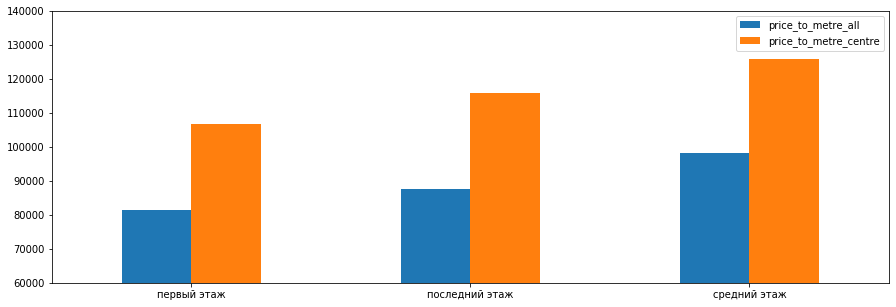

In [527]:
d3[['price_to_metre_all','price_to_metre_centre']].plot(kind='bar', figsize=(15,5), rot=0)
plt.ylim(60000,140000)
plt.gca().set_xticklabels(d3['floor_cat'])
plt.show()

Для квартир расположенных в центре характерно меньшее обесценение для квартир расположенных на первых и последних этажах, чем для квартир во всей базе.

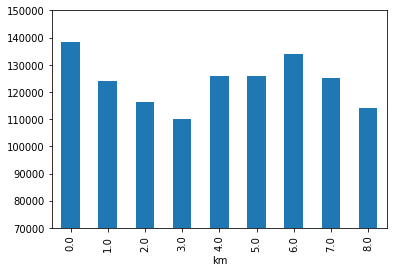

In [528]:
df_spb_centr.groupby('km')['price_to_metre'].median().plot(kind='bar')
plt.ylim(70000,150000)
plt.show()

Для центра города есть нестандартная динамика по мере удаления от центра города, максимальная стоимость квадратного метра достигается в радиусе 1 км, затем она начинает падать и достигает своего минимума на расстоянии 3 км от центра, после чего начинается резкий рост стоимости. Данная динамика предположительно обусловлена тем, что в радиусе 3 км от центра города расположены исторические здания, построенные несколько веков назад, проживание в такой недвижимости требует больших затрат на поддержание зданий в приемлемом виде, также в таких зданиях запрещена перепланировка. На расстоянии 4 км от центра и более находятся уже дома новой современной застройки.

In [529]:
d1 = df.groupby('month_year_exp')['price_to_metre'].median().to_frame().reset_index()
d2 = df_spb_centr.groupby('month_year_exp')['price_to_metre'].median().to_frame().reset_index()
d3 = d1.merge(d2, on='month_year_exp', how='inner', suffixes=('_all', '_centre'))
d3['%'] = (d3['price_to_metre_centre'] / d3['price_to_metre_all'] - 1)*100

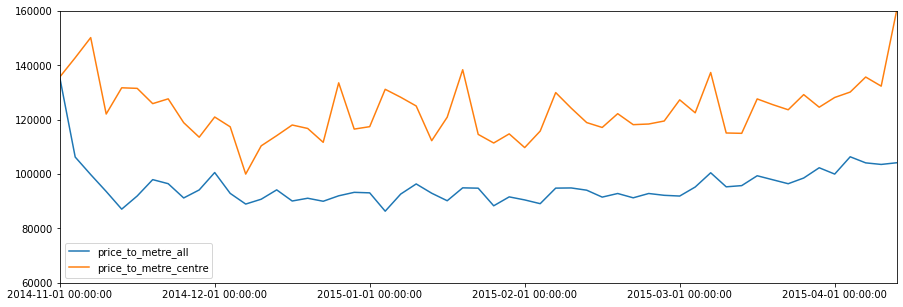

In [530]:
d3[['price_to_metre_all','price_to_metre_centre']].plot(kind='line', figsize=(15,5), rot=0)
plt.ylim(60000,160000)
plt.gca().set_xticklabels(d3['month_year_exp'])
plt.show()

In [531]:
d1 = df.groupby('month_exposition')['price_to_metre'].median().to_frame().reset_index()
d2 = df_spb_centr.groupby('month_exposition')['price_to_metre'].median().to_frame().reset_index()
d3 = d1.merge(d2, on='month_exposition', how='inner', suffixes=('_all', '_centre'))
d3['%'] = (d3['price_to_metre_centre'] / d3['price_to_metre_all'] - 1)*100
d3

,month_exposition,price_to_metre_all,price_to_metre_centre,%
0,1,95180.72,126966.29,33.39
1,2,95000.00,120747.00,27.10
2,3,95235.68,129373.34,35.85
3,4,96543.70,122757.01,27.15
4,5,92776.89,125609.76,35.39
5,6,92857.14,116872.43,25.86
6,7,95000.00,119545.76,25.84
7,8,96052.63,125000.00,30.14
8,9,95623.54,122448.98,28.05
9,10,94212.56,120000.00,27.37


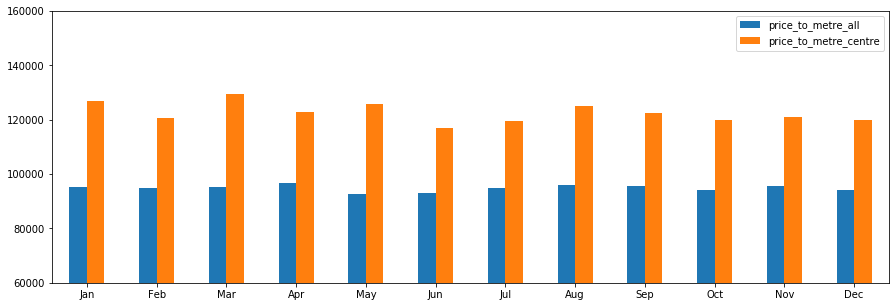

In [532]:
d3[['price_to_metre_all','price_to_metre_centre']].plot(kind='bar', figsize=(15,5), rot=0)
plt.ylim(60000,160000)
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

В целом цена квадратного метра в центре города и во всей базе имеют схожую динамику и сезонность. При этом ввиду того, что объектов недвижимости в центре города меньше и разброс цен у них существенно выше чем в целом по базе, недвижимости в центре города свойственно большее колебание цены.

### Шаг 5. Общий вывод

В ходе проведенного анализа выявленны следующие факторы, влияющие на итоговую стоимость квартиры:

1) Удаленность от центра города (чем дальше от центра города и дальше от Санкт_Петербурга, тем стоимость одного квадратного метра ниже);

2) Количества комнат и площади квартиры: высокая стоимость квадратного метра наблюдается у небольших однокомнатных квартир, либо у больших многокомнатных (4 комнаты и более), наименьгая стоимость у 3 комнатных квартир небольшой пощади (50-70 кв.м.);

3) Этаж расположения квартиры: расположение квартиры на первом этаже снижает стоимость квартиры почти на 17%, квартиры расположенные на последних этажах стоят в среднем на 11% дешевле;

4) Высота потолков: на рынке приобладают квартры с высотой потолков 2.5-2.7 метров, при этом чем выше высота потолков, тем выше стоимость квадратного метра. При этом высокие потолки как правило в квартирах с большой площадью и расположены они ближе к центру города. Можно считать,что высокие потолки являются одним из факторов, которые относят квартиры к более высокому классу жилья и отличают их от эконом жилья;

5) Наличие парков и водоемов в пешей доступности также положительно сказывается на стоимости жилья. Их наличие повышает стоимость объекта недвижимости примерно на 20%. При этом квартиры расположенные в центре города в 89% случаев имеют в непосредственной близости данные природные объекты, в то время как по мере удаления от центра города доступность таких объетов снижается (в среднем по базе только у 51% есть вблизи парки или водоемы);

6) В целом квартиры расположенные в центре города обладают более высокими храрктеристиками (больше площадь, больше количество комнат, выше высота потолков, больше парков/водоемов, близость их к деловому центру, что определяет время затрачиваемое ежедневно на дорогу до работы/с работы) ориентированы на людей с более высоким уровнем доходов, что в конечном итоге обуславливает более высокую стоимость жилья.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод